# Car Price Prediction Model

### Analyzing features

+ **Name** - The brand and model of the car.
+ **Year** -  The year of the car's model.
+ **Selling Price** -  The selling price of the car (to be predicted).
+ **KM driven** - The distance travelled of the car in kilometers.
+ **Fuel** - The fuel type of the car.
+ **Seller Type** -  The type of seller of the car listing.
+ **Transmission** - The type of transition of the car.
+ **Owner** - The number of previous owners of the car.
+ **Mileage** - The fuel efficiency of the car.
+ **Engine** - The engine power of the car.
+ **Max Power** - The horsepower of the car sent to the wheels.
+ **Torque** - The force generated by the car's engine.
+ **Seats** - The number of seats in the car.



### Importing Libraries

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PolynomialFeatures
warnings.filterwarnings('ignore')

### Checking library versions

In [94]:
import matplotlib
np.__version__, pd.__version__,sns.__version__,matplotlib.__version__

('1.26.4', '2.2.2', '0.13.2', '3.9.2')

### 1. Load data


In [95]:
# Load the csv file into a variable
df = pd.read_csv('.\data\Cars.csv')

In [96]:
# Check the headers of the data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [97]:
# Check the shape of the data
df.shape

(8128, 13)

In [98]:
# Check the data types of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [99]:
# Checking the columns
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

### 2. Exploratory Data Analysis

The names of the columns are determined to not need renaming.

As per the instructions, the lines of data containing CNG and LPG as fuel, test drive cars as owner will be deleted. The column of torque will also be deleted.

In [100]:
df = df[df.fuel != "CNG"]


In [101]:
df = df[df.fuel != "LPG"]

In [102]:
df = df[df.owner != "Test Drive Car"]

In [103]:
df.pop("torque")

0                  190Nm@ 2000rpm
1             250Nm@ 1500-2500rpm
2           12.7@ 2,700(kgm@ rpm)
3        22.4 kgm at 1750-2750rpm
4           11.5@ 4,500(kgm@ rpm)
                  ...            
8123             113.7Nm@ 4000rpm
8124    24@ 1,900-2,750(kgm@ rpm)
8125               190Nm@ 2000rpm
8126          140Nm@ 1800-3000rpm
8127          140Nm@ 1800-3000rpm
Name: torque, Length: 8028, dtype: object

In [104]:
df.shape

(8028, 12)

### Label encoding

The replace method is used since LabelEncoder from sklearn does not allow for custom order. The map dictionary contains the order mapping of the owner column. Since rows containing "Test Drive Car" are already deleted, it is not included in the mapping.

In [105]:
map  = {
    "First Owner": 1,
    "Second Owner": 2,
    "Third Owner": 3, 
    "Fourth & Above Owner": 4
    }

df.replace({"owner":map}, inplace = True)
df.head()



,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [106]:
df.mileage = df.mileage.str.split().str[0]
df.mileage = df.mileage.astype(float)

In [107]:
df.engine = df.engine.str.split().str[0]
df.engine = df.engine.astype(float)

In [108]:
df.max_power = df.max_power.str.split().str[0]
df.max_power =  df.max_power.astype(float)

In [109]:
df.name = df.name.str.split().str[0]

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 815.3+ KB


In [111]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


### Univariate analysis
**Count Plot**

The "fuel", "transmission" and "seats" columns will be analyzed using count plot since the values of these columns contain only a few variations and count plot will clearly show the distribution of the values.

<Axes: xlabel='fuel', ylabel='count'>

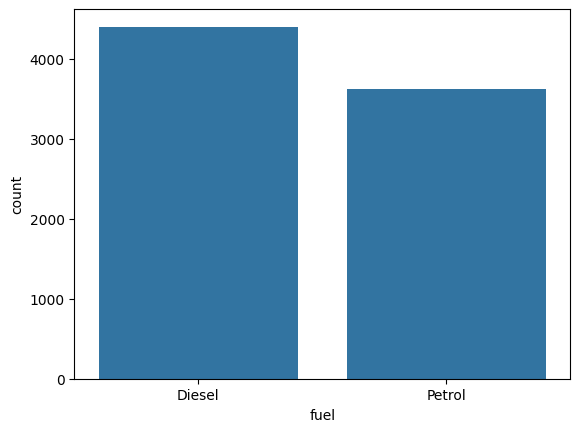

In [112]:
sns.countplot(data= df, x = "fuel")

<Axes: xlabel='transmission', ylabel='count'>

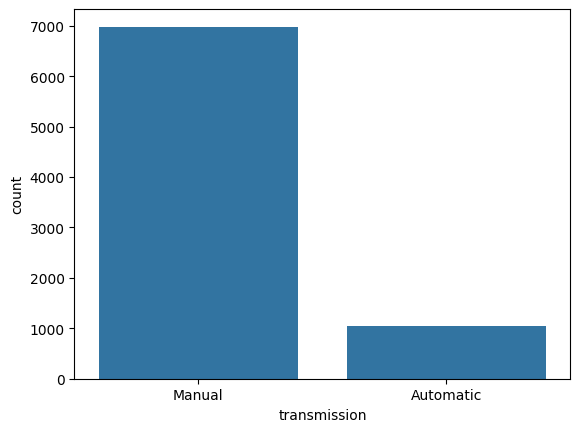

In [113]:
sns.countplot(data =df , x = "transmission")

<Axes: xlabel='seats', ylabel='count'>

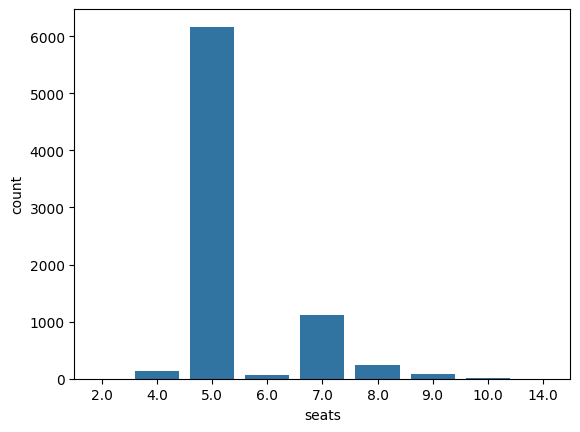

In [114]:
sns.countplot(data = df, x = 'seats')

We can observe that although the types of fuel of the cars are somewhat evenly distributed, the major of the cars have a manual transmission and are five seaters.

**Distribution Plot**

The "year" column will be analyzed by using distribution plot to see its distribution

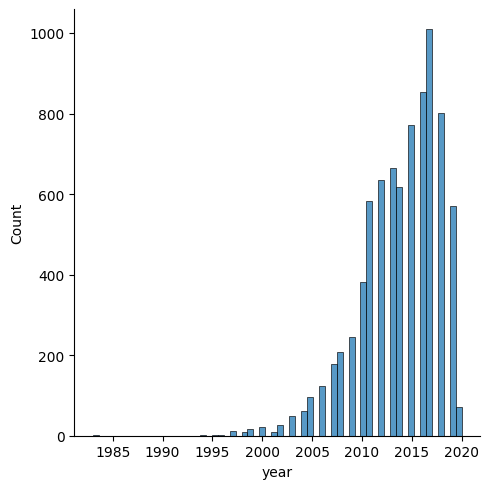

In [115]:
sns.displot(data= df, x = 'year')

### Multivariate Analysis
**Box Plot**

The "fuel" column will be analyzed using box plot in relation to the selling price of the car to see if any outliers exist and how the distribution impacts the price.

Text(0.5, 0, 'Fuel Name')

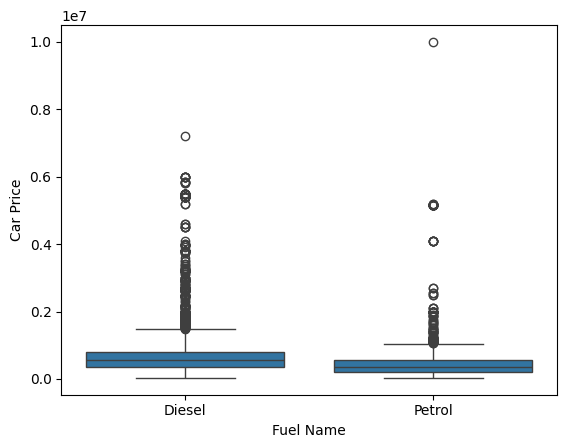

In [116]:
sns.boxplot(x =df.fuel, y = df.selling_price)
plt.ylabel("Car Price")
plt.xlabel("Fuel Name")

**Scatter Plot**

The "year" column and the "transmission" colum are used in a scatter plot to see the relation between their values and the selling price of the cars.

<Axes: xlabel='year', ylabel='selling_price'>

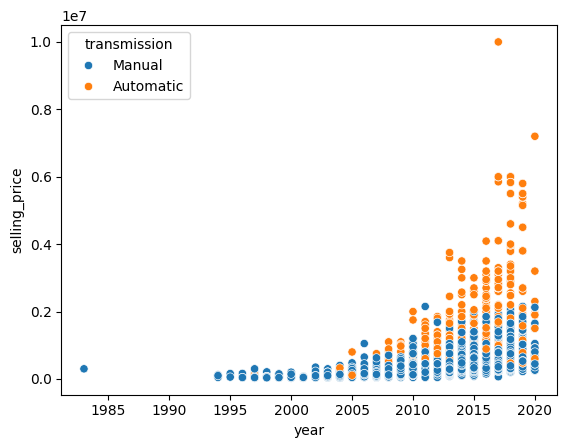

In [117]:
sns.scatterplot(x =df.year, y= df.selling_price, hue=df.transmission)

In addition to the modifications from the instructions, the "name" column will also be label encoded. The reason being that the brand of the cars might have a significant impact on the sell price of the cars and as such, the data of this column needs to explored during EDA phase, and the correlation matrix requires this column to be label encoded.

In [118]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df.name = le.fit_transform(df.name)
df.name.unique()



array([20, 27, 10, 11, 29,  9, 26, 19, 28,  4,  7,  6, 14, 21, 22,  2, 30,
        3, 23, 17, 13, 16, 18, 31,  5, 15,  8,  0,  1, 12, 24, 25])

In [119]:
le.classes_

array(['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo',
       'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
       'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
       'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel',
       'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [120]:
name_map = {}
keys = le.classes_
values = df.name.unique()
for key in keys:
    for value in values:
        name_map[key] = value
        values  = np.delete(values, np.where(values == value))
        break
name_map

{'Ambassador': 20,
 'Ashok': 27,
 'Audi': 10,
 'BMW': 11,
 'Chevrolet': 29,
 'Daewoo': 9,
 'Datsun': 26,
 'Fiat': 19,
 'Force': 28,
 'Ford': 4,
 'Honda': 7,
 'Hyundai': 6,
 'Isuzu': 14,
 'Jaguar': 21,
 'Jeep': 22,
 'Kia': 2,
 'Land': 30,
 'Lexus': 3,
 'MG': 23,
 'Mahindra': 17,
 'Maruti': 13,
 'Mercedes-Benz': 16,
 'Mitsubishi': 18,
 'Nissan': 31,
 'Opel': 5,
 'Peugeot': 15,
 'Renault': 8,
 'Skoda': 0,
 'Tata': 1,
 'Toyota': 12,
 'Volkswagen': 24,
 'Volvo': 25}

The "fuel","seller type" and "transmission" columns will also be label encoded for the above reasons, although the impact of these features is unknown.

In [121]:
df.fuel = le.fit_transform(df.fuel)
df.fuel.unique()

array([0, 1])

In [122]:
le.classes_

array(['Diesel', 'Petrol'], dtype=object)

In [123]:
df.seller_type = le.fit_transform(df.seller_type)
df.seller_type.unique

<bound method Series.unique of 0       1
1       1
2       1
3       1
4       1
       ..
8123    1
8124    1
8125    1
8126    1
8127    1
Name: seller_type, Length: 8028, dtype: int32>

In [124]:
le.classes_

array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object)

In [125]:
df.transmission  = le.fit_transform(df.transmission)
df.transmission.unique()

array([1, 0])

In [126]:
le.classes_

array(['Automatic', 'Manual'], dtype=object)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8028 non-null   int32  
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   int32  
 5   seller_type    8028 non-null   int32  
 6   transmission   8028 non-null   int32  
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(4), int32(4), int64(4)
memory usage: 689.9 KB


**Correlation Matrix**

The correlation matrix shows us how each of the features related to one another and most importantly, how they relate to our label; the selling price of the cars.

<Axes: >

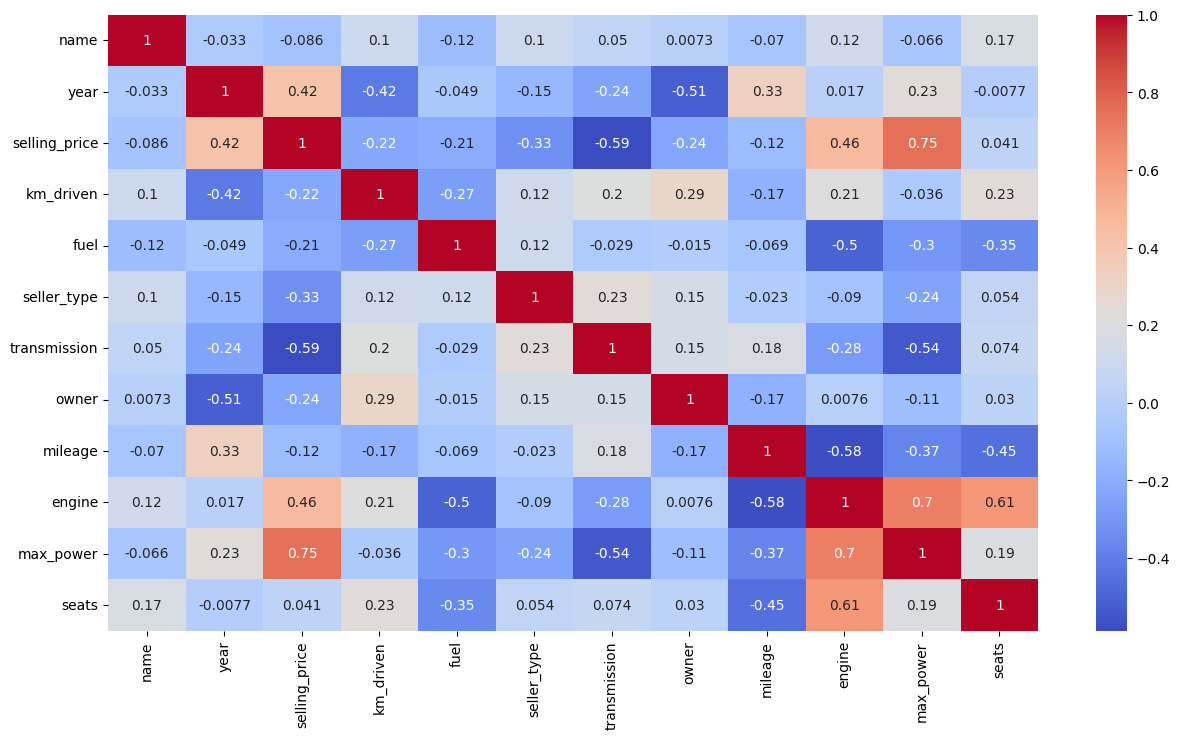

In [128]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")

These three features—engine size, max power, and mileage—are interrelated, with engine and max power being positively correlated, while both tend to negatively correlate with mileage. Together, they provide a comprehensive view of a car’s performance and efficiency, making them valuable predictors for estimating the car’s selling price.



**Predictive Power Score**

The predictive power score library is used to more accurately see the correlation results and confirm our assumptions of the relation of the features to the label.

<Axes: xlabel='x', ylabel='y'>

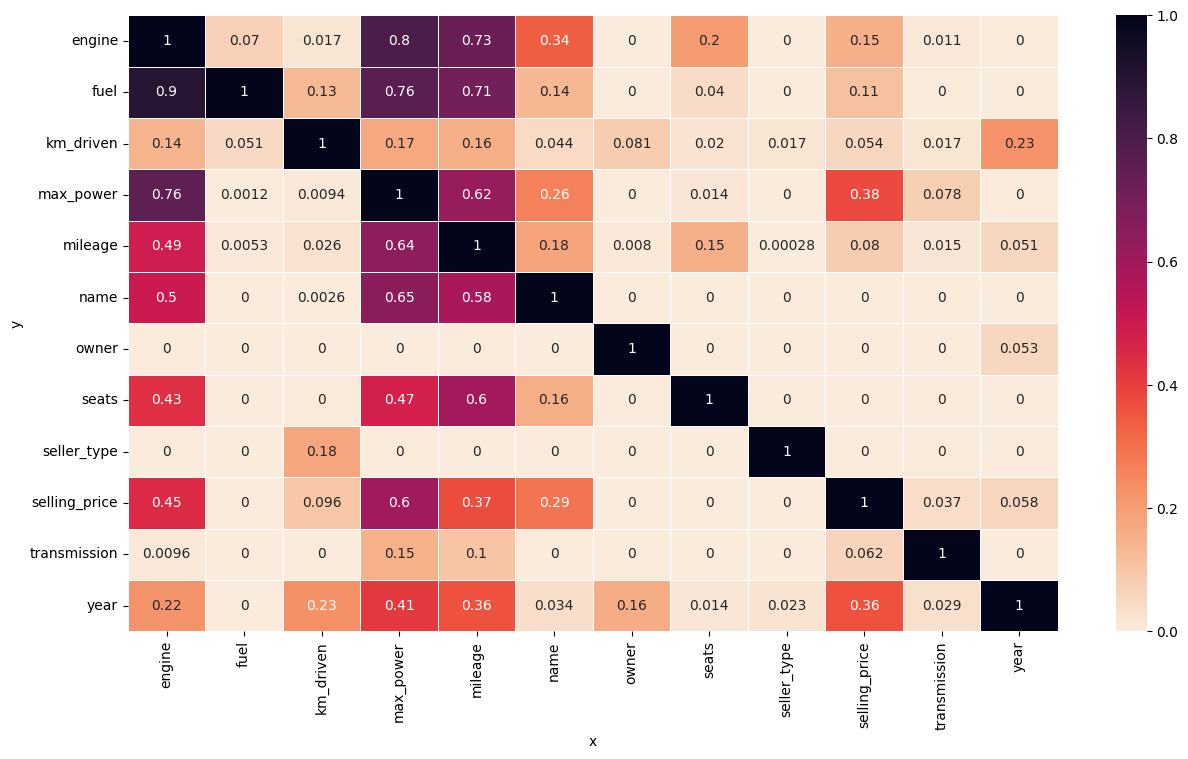

In [129]:
import ppscore as pps
dfcopy = df.copy()
matrix_df = pps.matrix(dfcopy)[['x','y','ppscore']].pivot(columns='x',index='y',values = 'ppscore')
plt.figure(figsize= (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1,cmap='rocket_r', linewidths = 0.5, annot=True)

### 3. Feature Engineering
The step of feature engineering is skipped considering most of the columns do not require to be merged or to produce derivations.

### 4. Feature Selection

The selected features for predicting the selling price of cars are `engine`, `max_power`, and `mileage`. The size of the engine is an important factor, as larger engines are often associated with greater performance and higher vehicle value. However, increased fuel consumption from larger engines may reduce appeal in some markets. Max power is chosen for its strong representation of a car’s performance, closely linked with engine size, and plays a key role in determining resale value, as cars with higher power typically command better prices. Mileage, representing fuel efficiency, is another critical feature, with cars that offer higher mileage often being more attractive to buyers concerned about fuel costs. Combining these features offers a strong foundation for accurately predicting a car's market value.

In [130]:
x = df[['engine','max_power','mileage']]
#y = np.log(df["selling_price"])

# Using qcut to turn selling price into a categorical label
y, k_range = pd.qcut(df["selling_price"], q=4,labels = [0,1,2,3],retbins=True)

In [131]:
# Showing the range of each category in y
k_range = {0:f"{k_range[0]} - {k_range[1]}",
     1:f"{k_range[1]} - {k_range[2]}",
     2:f"{k_range[2]} - {k_range[3]}",
     3:f"{k_range[3]} - {k_range[4]}"}
k_range

{0: '29999.0 - 260000.0',
 1: '260000.0 - 450000.0',
 2: '450000.0 - 680000.0',
 3: '680000.0 - 10000000.0'}

**Train Test Split**

In [132]:
from sklearn.model_selection import train_test_split

X_train,  X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=44)

### 5. Preprocessing

In [133]:
k = len(set(y))  # no. of class  (can also use np.unique)
m = X_train.shape[0]  # no.of samples
n = X_train.shape[1]  # no. of features
Y_train_encoded = np.zeros((m, k))
for each_class in range(k):
    cond = y_train==each_class
    Y_train_encoded[np.where(cond), each_class] = 1

Y_test_encoded = np.zeros((m, k))
for each_class in range(k):
    cond = y_test==each_class
    Y_test_encoded[np.where(cond), each_class] = 1

In [134]:
# Check for null values
X_train[['engine', 'max_power','mileage']].isna().sum()

engine       159
max_power    153
mileage      159
dtype: int64

In [135]:
X_test[['engine','max_power','mileage']].isna().sum()

engine       55
max_power    55
mileage      55
dtype: int64

In [136]:
y_train.isna().sum()

0

In [137]:
y_test.isna().sum()

0

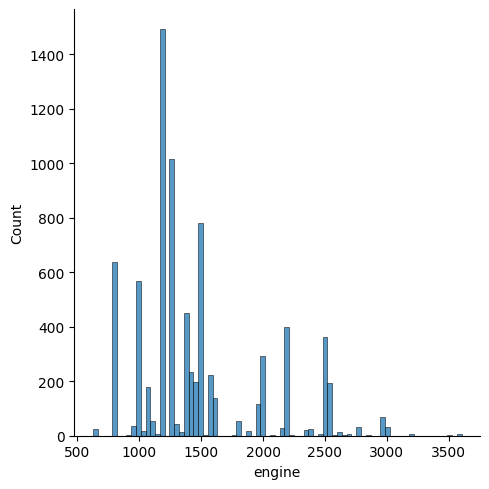

In [138]:
sns.displot(data=df, x='engine')

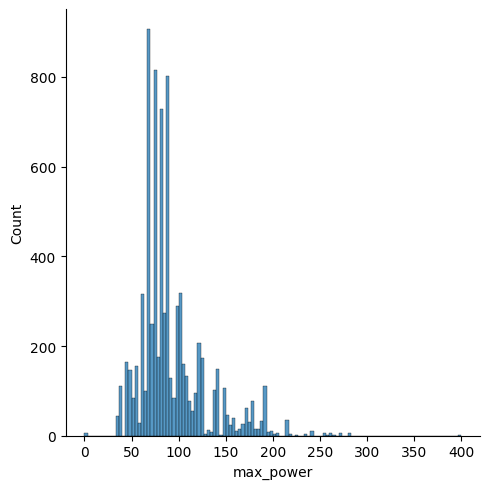

In [139]:
sns.displot(data = df, x= 'max_power')

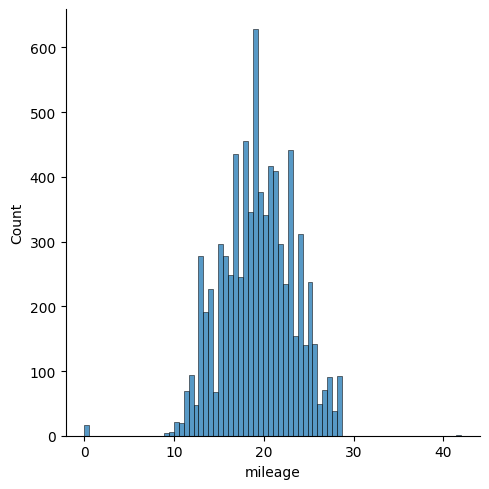

In [140]:
sns.displot(data =df, x ='mileage')

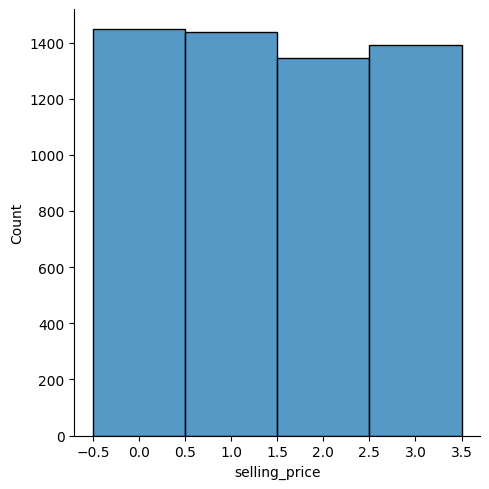

In [141]:
sns.displot(y_train)

In [142]:
engine_default = X_train['engine'].median()
max_power_default = X_train['max_power'].median()
mileage_default = X_train['mileage'].mean()

In [143]:
X_train['engine'].fillna(X_train['engine'].median(), inplace = True)
X_train['max_power'].fillna(X_train['max_power'].median(), inplace = True)
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace = True)

In [144]:
X_test['engine'].fillna(X_test['engine'].median(), inplace = True)
X_test['max_power'].fillna(X_test['max_power'].median(), inplace= True)
X_test['mileage'].fillna(X_test['mileage'].mean(), inplace = True)

In [145]:
# y_train.fillna(y_train.median(), inplace =True)
# y_test.fillna(y_test.median(), inplace = True)

In [146]:
X_train[['engine', 'max_power', 'mileage']].isna().sum()

engine       0
max_power    0
mileage      0
dtype: int64

In [147]:
X_test[['engine','max_power', 'mileage']].isna().sum()

engine       0
max_power    0
mileage      0
dtype: int64

In [148]:
y_train.isna().sum()

0

In [149]:
y_test.isna().sum()

0

**Checking outliers**

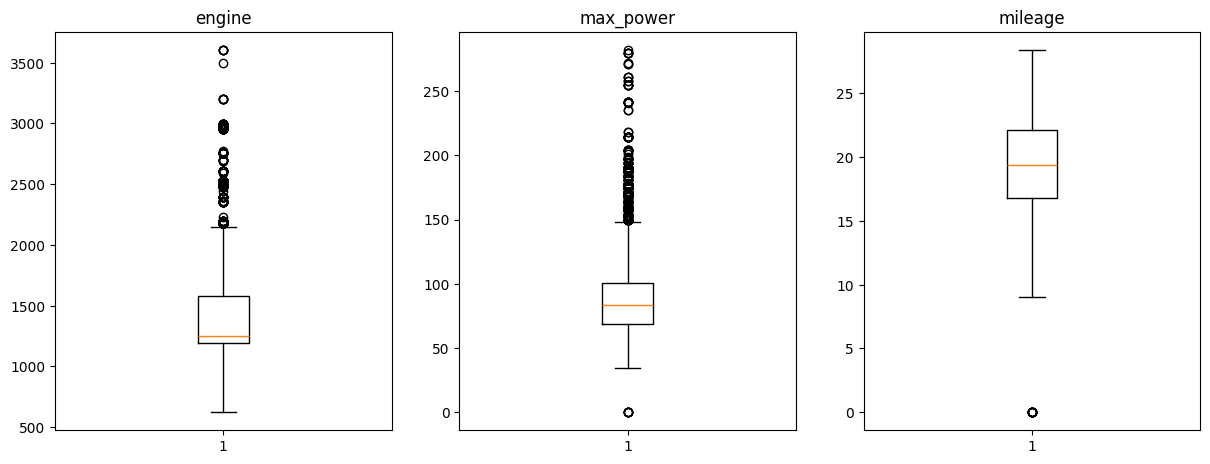

In [150]:
col_dict = {'engine':1,'max_power':2,'mileage':3}
plt.figure(figsize = (20,30))

for variable, i in col_dict.items():
    plt.subplot(5,4,i)
    plt.boxplot(X_train[variable])
    plt.title(variable)
plt.show()

In [151]:
def outlier_count(col, data = X_train):
    q75, q25 = np.percentile(data[col], [75,25])
    iqr = q75 -q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)

    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100,2)

    if (outlier_count > 0):
        print("\n"+ 15 * '-' + col + 15 * '-' + "\n")
        print("Number of outliers: {}".format(outlier_count))
        print("Percent of data that is outlier: {}%".format(outlier_percent))

In [152]:
for col in X_train.columns:
    outlier_count(col)


---------------engine---------------

Number of outliers: 830
Percent of data that is outlier: 14.77%

---------------max_power---------------

Number of outliers: 439
Percent of data that is outlier: 7.81%

---------------mileage---------------

Number of outliers: 14
Percent of data that is outlier: 0.25%


**Scaling**

In [153]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.fit_transform(X_test)

In [154]:
# y_train = y_train.values

In [155]:
# add intercept to our X
intercept = np.ones((X_train.shape[0],1))
X_train = np.concatenate((intercept,X_train), axis=1)
intercept = np.ones((X_test.shape[0],1))
X_test = np.concatenate((intercept, X_test),axis=1)

In [156]:
# Shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", Y_train_encoded.shape)
print("Shape of y_test: ", Y_test_encoded.shape)

Shape of X_train:  (5619, 4)
Shape of X_test:  (2409, 4)
Shape of y_train:  (5619, 4)
Shape of y_test:  (5619, 4)


### 6. Modeling

In [157]:
class LogisticRegression:
    
    def __init__(self,regularization, k, n, method, alpha = 0.001,theta_init='zeros', max_iter=5000):
        self.regularization = regularization
        self.k = k
        self.n = n
        self.alpha = alpha
        self.max_iter = max_iter
        self.theta_init = theta_init
        self.method = method
        # self.pre = []  # Initialize as empty lists
        # self.re = []
        # self.f1 = []
        # self.ratio = []
        # self.support = []
    
    def fit(self, X, Y):
        # self.W = np.random.rand(self.n, self.k)
        if self.theta_init == 'zeros':
            self.W = np.zeros((self.n, self.k))
        elif self.theta_init == 'xavier':
            m = X_train.shape[0]
            # calculate the range for the weights
            lower , upper = -(1.0 / math.sqrt(m)), (1.0 / math.sqrt(m))
            # randomly pick weights within this range
            # generate random numbers
            numbers = np.random.rand((self.n, self.k))
            self.W = lower + numbers * (upper - lower)
            
        self.losses = []
        
        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad =  self.gradient(X, Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0])
            # batch_size = 32
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0]) #<----with replacement
                batch_X = X[ix:ix+batch_size]
                batch_Y = Y[ix:ix+batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "sto":
            start_time = time.time()
            list_of_used_ix = []
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])
                while i in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                
                list_of_used_ix.append(i)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')
        
        
    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = - np.sum(Y*np.log(h)) / m + self.regularization(self.W)
        error = h - Y
        grad = self.softmax_grad(X, error)  + self.regularization.derivation(self.W)
        return loss, grad

    def softmax(self, theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return  X.T @ error

    def h_theta(self, X, W):
        '''
        Input:
            X shape: (m, n)
            w shape: (n, k)
        Returns:
            yhat shape: (m, k)
        '''
        return self.softmax(X @ W)
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()

    # Accuracy function of the model
    def accuracy(self, X, Y):
        # accuracy = correct pred / total pred
        yhat = self.predict(X)
        return np.sum(yhat == Y)/ yhat.shape[0]
    
    def confusion_matrix(self, ytrue, ypred):
        # convert arrays to lists to allow easy data manipulation
        y_p = ypred.tolist()
        y_a = ytrue.tolist()

        # initialize empty confusion matrix
        cm = [[0 for x in range(self.k)] for y in range(self.k)]

        # ensure numnber of prediction and actual values are the same
        assert len(y_p) == len(y_a)

        # fill the confusion matrix
        for i in range (len(y_p)):
            for j in range (self.k):
                for l in range(self.k):
                    if y_a[i] == j and y_p[i] == l:
                        cm[j][l] += 1
        
        # true positive list (when cm[i][i])
        self.tp = [0 for x in range(self.k)]
        for i in range (self.k):
            self.tp[i] = cm[i][i]

        # true negative list is no required for precision and recall
        # false negative list
        self.fn = [0 for x in range (self.k)]
        for i in range (self.k):
            for j in range (self.k):
                if j != i:
                    self.fn[i] += cm[i][j]
        
        # false positive list
        self.fp = [0 for x in range (self.k)]
        for i in range (self.k):
            for j in range (self.k):
                if j != i:
                    self.fp[i] += cm[j][i]
    
    def precision(self):
        self.pre = [0 for x in range (self.k)]
        for i in range (self.k):
            if (self.tp[i] + self.fp[i]) == 0:
                self.pre[i] = 0
            else:
                self.pre[i] = self.tp[i] / (self.tp[i] + self.fp[i])
        return self.pre
    
    def recall(self):
        self.re = [0 for x in range (self.k)]
        for i in range (self.k):
            if (self.tp[i] + self.fp[i]) == 0:
                self.re[i] = 0
            else:
                self.re[i] = self.tp[i] / (self.tp[i] + self.fn[i])
        return self.re
    
    def f1_score(self):
        self.f1 = [0 for x in range (self.k)]
        for i in range (self.k):
            if self.pre[i] == 0 and self.re[i] == 0:
                self.f1[i] = 0
            else:
                self.f1[i] = (2 * self.pre[i] * self.re[i]) / (self.pre[i] + self.re[i])
        return self.f1
    
    def macro_precision(self):
        return sum(self.pre) / len(self.pre)
    
    def macro_recall(self):
        return sum(self.re) / len(self.re)
    
    def macro_f1(self):
        return sum(self.f1) / len(self.f1)
    
    def weighted_precision(self):
        denominator = 0
        for i in range (self.k):
            denominator += self.support[i]*self.pre[i]
        return denominator / self.Y_num
    
    def weighted_recall(self):
        denominator = 0
        for i in range (self.k):
            denominator += self.support[i]*self.re[i]
        return denominator / self.Y_num
    
    def weighted_f1(self):
        denominator = 0
        for i in range (self.k):
            denominator += self.support[i]*self.f1[i]
        return denominator / self.Y_num
    
    def classification_report_scratch(self, X, Y):
        # Method to show classification report similar to sklearn
                    
        # Call confusion matrix method to set TP,TN,FP,FN
        self.confusion_matrix(Y, self.predict(X))
        print(self.tp, self.fp, self.fn)

        # Calculate ratio of y for weighted calculations
        self.ratio = Y.value_counts(normalize=True, sort=False)

        # Support for classification report
        self.support = Y.value_counts(normalize=False, sort=False)

        # Total number of samples
        self.Y_num = Y.shape[0]

        # Call all methods to store values
        self.precision()
        self.recall()
        self.f1_score()
        macro_precision = self.macro_precision()  # Call these methods
        macro_recall = self.macro_recall()        # to calculate their values
        macro_f1 = self.macro_f1()                # before using them
    

        print("=========Classification report scratch=======")
        print("\t\tprecision \trecall \tf1 \tsupport\n")
        for i in range(self.k):
            print(f"{i} \t\t{self.pre[i]:.2f} \t{self.re[i]:.2f} \t{self.f1[i]:.2f} \t{self.support[i]}")
        print(f"\naccuracy \t\t\t{self.accuracy(X, Y):.2f} \t{Y.shape[0]}")
        print(f"macro avg \t{macro_precision:.2f} \t{macro_recall:.2f} \t{macro_f1:.2f} \t{Y.shape[0]}")
        print(f"weighted avg \t{self.weighted_precision():.2f} \t{self.weighted_recall():.2f} \t{self.weighted_f1():.2f} \t{Y.shape[0]}")

    def _coef(self):
        return self.W[1:]
    
    def feature_importance(self):
        feature_names = ['engine', 'max_power', 'mileage']
        importance_values = np.mean(np.abs(self._coef()[0:34]), axis=1)

        # Create a bar chart for feature importance
        plt.figure(figsize=(8, 6))
        plt.barh(feature_names, importance_values, color='blue')
        plt.xlabel('Feature Importance')
        plt.title('Feature Importance Graph')
        plt.xlim([0,np.max(self._coef())])  # Set the x-axis limits
        plt.grid(axis='x', linestyle='--', alpha=0.6)

        plt.show()


In [158]:
class NormalPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return 0 # returning zero because normal just means using linear regression with no regularization
        
    def derivation(self, theta):
        return 0 # returning zero because normal just means using linear regression with no regularization

class LassoPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.abs(theta))
        
    def derivation(self, theta):
        return self.l * np.sign(theta)
    
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta
    
class ElasticPenalty:
    
    def __init__(self, l = 0.1, l_ratio = 0.5):
        self.l = l 
        self.l_ratio = l_ratio

    def __call__(self, theta):  #__call__ allows us to call class as method
        l1_contribution = self.l_ratio * self.l * np.sum(np.abs(theta))
        l2_contribution = (1 - self.l_ratio) * self.l * 0.5 * np.sum(np.square(theta))
        return (l1_contribution + l2_contribution)

    def derivation(self, theta):
        l1_derivation = self.l * self.l_ratio * np.sign(theta)
        l2_derivation = self.l * (1 - self.l_ratio) * theta
        return (l1_derivation + l2_derivation)
    
class Normal(LogisticRegression):
    
    def __init__(self, k, n, method, alpha=0.001,theta_init='zeros', l=0.1):
        self.regularization = NormalPenalty(l)
        super().__init__(self.regularization, k, n, method, alpha,theta_init='zeros')

class Lasso(LogisticRegression):
    
    def __init__(self, k, n, method, alpha=0.001,theta_init='zeros', l=0.1):
        self.regularization = LassoPenalty(l)
        super().__init__(self.regularization, k, n, method, alpha,theta_init='zeros')
        
class Ridge(LogisticRegression):
    
    def __init__(self, k, n, method, alpha=0.001,theta_init='zeros', l=0.1):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization, k, n, method, alpha,theta_init='zeros')
        
class ElasticNet(LogisticRegression):
    
    def __init__(self, k, n, method, alpha=0.001,theta_init='zeros', l=0.1, l_ratio=0.5):
        self.regularization = ElasticPenalty(l, l_ratio)
        super().__init__(self.regularization, k, n, method, alpha,theta_init='zeros')


In [159]:
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [160]:
import mlflow
import os
import mlflow.sklearn


In [161]:
#experiment tracking
mlflow.set_tracking_uri("http://mlflow.ml.brain.cs.ait.ac.th/")
#os.environ["LOGNAME"] = "marn"
#mlflow.set_experiment(experiment_name="marn-car-price-prediction")


In [162]:
os.environ["MLFLOW_TRACKING_USERNAME"] = "admin"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "password"

In [72]:
mlflow.set_experiment(experiment_name="st125437-a3")          

<Experiment: artifact_location='mlflow-artifacts:/461540549134835311', creation_time=1728126507275, experiment_id='461540549134835311', last_update_time=1728126507275, lifecycle_stage='active', name='st125437-a3', tags={}>

In [72]:
from sklearn.preprocessing import PolynomialFeatures
import time
#iterating through all possible parameters
polynomials = [2,3,4,"no"]
regs = ["Ridge", "Lasso", "ElasticNet","Normal"] #type of regularization
methods = ["batch","minibatch","sto"]
alphas = [0.01,0.001,0.0001]


for polynomial in polynomials:
    for reg in regs:
        for method in methods:
            for alpha in alphas:
                if polynomial == "no":
                    X_train_poly, X_test_poly = X_train, X_test # No transformation for other regressions
                else:
                    # Apply polynomial feature transformation
                    poly = PolynomialFeatures(degree=polynomial, include_bias=False)
                    X_train_poly = poly.fit_transform(X_train)
                    X_test_poly = poly.transform(X_test)                
                # #######

                k_num = k
                n = X_train_poly.shape[1]
                params = {"k":k_num, "n":n, "method": method,"alpha": alpha, "l": 0.1}
                mlflow.start_run(run_name=f"method-{params['method']}-reg-{reg}", nested=True)
                mlflow.log_params(params=params)

                print("="*5, polynomial, "="*5)
                print("="*5, reg, "="*5)                        
                print("="*5, method, "="*5)  
                print("="*5, alpha, "="*5)
                                      

                
                type_of_regression = str_to_class(reg)    #Ridge, Lasso, ElasticNet, Normal
                model = type_of_regression(**params)  
                model.fit(X_train_poly, Y_train_encoded)
                yhat = model.predict(X_train_poly)

                model.classification_report_scratch(X_train_poly,y_train)
                acc = model.accuracy(X_train_poly,y_train)
                f1 = model.weighted_f1()

                print("Accuracy: ", acc)
                mlflow.log_metric(key="accuracy", value=acc)

                print("F1 score: ", f1)
                mlflow.log_metric(key="weighted_f1_score", value=f1)

                signature = mlflow.models.infer_signature(X_train_poly, model.predict(X_train_poly))
                mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

                # #######

                mlflow.end_run()

===== 2 =====
===== Ridge =====
===== batch =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 2.4534871578216553
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:09:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-Ridge at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/7842dd8fa381474b85c12029bda56cbb.
2024/10/05 18:09:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 2 =====
===== Ridge =====
===== batch =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 11.375311169683247
Loss at iteration 1000 11.64891803747484
Loss at iteration 1500 10.783069730658209
Loss at iteration 2000 19.262547724755485
Loss at iteration 2500 9.554676396748055
Loss at iteration 3000 13.448926569714684
Loss at iteration 3500 14.010156011415315
Loss at iteration 4000 11.257997469551439
Loss at iteration 4500 14.094551853574721
time taken: 2.6993179321289062
[1178, 0, 575, 1007] [1278, 0, 882, 699] [269, 1436, 771, 383]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.48 	0.81 	0.60 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.39 	0.43 	0.41 	1346
3 		0.59 	0.72 	0.65 	1390

accuracy 			0.49 	5619
macro avg 	0.37 	0.49 	0.42 	5619
weighted avg 	0.36 	0.49 	0.41 	5619
Accuracy:  0.49119060331019754
F1 score:  0.4146489792782436


2024/10/05 18:09:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-Ridge at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/42507e565f0147539a6806e71cb06798.
2024/10/05 18:09:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 2 =====
===== Ridge =====
===== batch =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 2.3581078522836445
Loss at iteration 1000 2.6107255801397597
Loss at iteration 1500 2.670953509692148
Loss at iteration 2000 2.6861983874927784
Loss at iteration 2500 2.690239615812509
Loss at iteration 3000 2.6913466154123378
Loss at iteration 3500 2.6916564152966362
Loss at iteration 4000 2.691744266792102
Loss at iteration 4500 2.6917693757679118
time taken: 3.3875951766967773
[968, 546, 471, 883] [601, 863, 818, 469] [479, 890, 875, 507]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.62 	0.67 	0.64 	1447
1 		0.39 	0.38 	0.38 	1436
2 		0.37 	0.35 	0.36 	1346
3 		0.65 	0.64 	0.64 	1390

accuracy 			0.51 	5619
macro avg 	0.51 	0.51 	0.51 	5619
weighted avg 	0.51 	0.51 	0.51 	5619
Accuracy:  0.5104111051788575
F1 score:  0.508355737976986


2024/10/05 18:09:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-Ridge at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/65e2cc99c59c4059ae5015401c1d0772.
2024/10/05 18:09:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 2 =====
===== Ridge =====
===== minibatch =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 0.7227632999420166
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:10:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-Ridge at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/dfd04b98ea8f473dab63a4a679bc583e.
2024/10/05 18:10:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 2 =====
===== Ridge =====
===== minibatch =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 2.794285084496577
Loss at iteration 1000 2.85140213120511
Loss at iteration 1500 2.897880234320242
Loss at iteration 2000 2.8466443939851134
Loss at iteration 2500 2.8303478761264422
Loss at iteration 3000 2.865079936628872
Loss at iteration 3500 2.8084435998134594
Loss at iteration 4000 2.8962621831942794
Loss at iteration 4500 2.8760162224742096
time taken: 0.7880134582519531
[1007, 406, 494, 1085] [642, 579, 702, 704] [440, 1030, 852, 305]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.61 	0.70 	0.65 	1447
1 		0.41 	0.28 	0.34 	1436
2 		0.41 	0.37 	0.39 	1346
3 		0.61 	0.78 	0.68 	1390

accuracy 			0.53 	5619
macro avg 	0.51 	0.53 	0.51 	5619
weighted avg 	0.51 	0.53 	0.52 	5619
Accuracy:  0.5324790888058374
F1 score:  0.5151985844585254


2024/10/05 18:10:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-Ridge at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/7ca03e1a78894434a3e7d1ef61d942b0.
2024/10/05 18:10:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 2 =====
===== Ridge =====
===== minibatch =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.7336803162806396
Loss at iteration 1000 2.015493412011223
Loss at iteration 1500 2.4390194726526273
Loss at iteration 2000 2.354496561121603
Loss at iteration 2500 2.453883914177544
Loss at iteration 3000 2.541090471459016
Loss at iteration 3500 2.5797392961208305
Loss at iteration 4000 2.5804650251849477
Loss at iteration 4500 2.592419205304145
time taken: 0.8112876415252686
[967, 550, 508, 895] [561, 877, 813, 448] [480, 886, 838, 495]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.63 	0.67 	0.65 	1447
1 		0.39 	0.38 	0.38 	1436
2 		0.38 	0.38 	0.38 	1346
3 		0.67 	0.64 	0.65 	1390

accuracy 			0.52 	5619
macro avg 	0.52 	0.52 	0.52 	5619
weighted avg 	0.52 	0.52 	0.52 	5619
Accuracy:  0.5196654208933974
F1 score:  0.5188741712406824


2024/10/05 18:10:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-Ridge at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/86d9940e053440d4ad2192ad44b8a891.
2024/10/05 18:10:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 2 =====
===== Ridge =====
===== sto =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.2401652529078253
Loss at iteration 1000 1.20312671511606
Loss at iteration 1500 0.23180542004647145
Loss at iteration 2000 1.3244188327090756
Loss at iteration 2500 1.0661578237053102
Loss at iteration 3000 1.282372467345178
Loss at iteration 3500 1.2350261810508898
Loss at iteration 4000 1.245436990402822
Loss at iteration 4500 1.139499099274516
time taken: 0.33957815170288086
[736, 776, 599, 600] [256, 1237, 1227, 188] [711, 660, 747, 790]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.74 	0.51 	0.60 	1447
1 		0.39 	0.54 	0.45 	1436
2 		0.33 	0.45 	0.38 	1346
3 		0.76 	0.43 	0.55 	1390

accuracy 			0.48 	5619
macro avg 	0.55 	0.48 	0.50 	5619
weighted avg 	0.56 	0.48 	0.50 	5619
Accuracy:  0.48247019042534256
F1 score:  0.4971842762795281


2024/10/05 18:10:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-Ridge at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/fb20d9d69db144baa47f4c725f83b613.
2024/10/05 18:10:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 2 =====
===== Ridge =====
===== sto =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.403256275701817
Loss at iteration 1000 1.2821622042482756
Loss at iteration 1500 1.3360448043328523
Loss at iteration 2000 1.290216748067509
Loss at iteration 2500 1.5376378294876154
Loss at iteration 3000 0.8481145564409034
Loss at iteration 3500 1.224796334556572
Loss at iteration 4000 1.3810394771542924
Loss at iteration 4500 1.3599435832858395
time taken: 0.1835920810699463
[1149, 477, 285, 854] [1021, 624, 544, 665] [298, 959, 1061, 536]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.53 	0.79 	0.64 	1447
1 		0.43 	0.33 	0.38 	1436
2 		0.34 	0.21 	0.26 	1346
3 		0.56 	0.61 	0.59 	1390

accuracy 			0.49 	5619
macro avg 	0.47 	0.49 	0.47 	5619
weighted avg 	0.47 	0.49 	0.47 	5619
Accuracy:  0.49208044135967255
F1 score:  0.46773215131999013


2024/10/05 18:10:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-Ridge at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/fc3aec297af14ae1aa33fc82fc505af6.
2024/10/05 18:10:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 2 =====
===== Ridge =====
===== sto =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.3816250518666917
Loss at iteration 1000 1.3753338971821683
Loss at iteration 1500 1.135414798911626
Loss at iteration 2000 1.4356432044798246
Loss at iteration 2500 1.367337998026757
Loss at iteration 3000 0.5627333220282851
Loss at iteration 3500 1.344054554963801
Loss at iteration 4000 1.2226397194343896
Loss at iteration 4500 0.8245663863083068
time taken: 0.18190431594848633
[1136, 368, 269, 884] [1213, 481, 442, 826] [311, 1068, 1077, 506]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.48 	0.79 	0.60 	1447
1 		0.43 	0.26 	0.32 	1436
2 		0.38 	0.20 	0.26 	1346
3 		0.52 	0.64 	0.57 	1390

accuracy 			0.47 	5619
macro avg 	0.45 	0.47 	0.44 	5619
weighted avg 	0.45 	0.47 	0.44 	5619
Accuracy:  0.4728599394910126
F1 score:  0.440183502022403


2024/10/05 18:10:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-Ridge at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/d9a68d817be546879c71e45a954ed3b9.
2024/10/05 18:10:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 2 =====
===== Lasso =====
===== batch =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 2.6866650581359863
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:10:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-Lasso at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/058f63f018964d2799106739a3f4cdda.
2024/10/05 18:10:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 2 =====
===== Lasso =====
===== batch =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 10.03026472521702
Loss at iteration 1000 8.549853717450656
Loss at iteration 1500 7.969125114930101
Loss at iteration 2000 9.504416898996606
Loss at iteration 2500 6.646042210107241
Loss at iteration 3000 7.042061406173466
Loss at iteration 3500 8.029443746702396
Loss at iteration 4000 7.339953840604814
Loss at iteration 4500 7.601002641696432
time taken: 3.1961889266967773
[921, 859, 0, 858] [746, 1654, 0, 581] [526, 577, 1346, 532]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.55 	0.64 	0.59 	1447
1 		0.34 	0.60 	0.44 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.60 	0.62 	0.61 	1390

accuracy 			0.47 	5619
macro avg 	0.37 	0.46 	0.41 	5619
weighted avg 	0.38 	0.47 	0.41 	5619
Accuracy:  0.46947855490300766
F1 score:  0.4135609100717924


2024/10/05 18:10:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-Lasso at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/486ade6990c64318865e84f2aceff199.
2024/10/05 18:10:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 2 =====
===== Lasso =====
===== batch =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 2.84784470432804
Loss at iteration 1000 3.0368505850861305
Loss at iteration 1500 3.0799188937349813
Loss at iteration 2000 3.0888745362494037
Loss at iteration 2500 3.089215908590897
Loss at iteration 3000 3.0875512691357105
Loss at iteration 3500 3.0852843759120745
Loss at iteration 4000 3.0828501352118547
Loss at iteration 4500 3.0803689642683
time taken: 9.058121919631958
[968, 546, 471, 883] [601, 863, 818, 469] [479, 890, 875, 507]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.62 	0.67 	0.64 	1447
1 		0.39 	0.38 	0.38 	1436
2 		0.37 	0.35 	0.36 	1346
3 		0.65 	0.64 	0.64 	1390

accuracy 			0.51 	5619
macro avg 	0.51 	0.51 	0.51 	5619
weighted avg 	0.51 	0.51 	0.51 	5619
Accuracy:  0.5104111051788575
F1 score:  0.508355737976986


2024/10/05 18:11:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-Lasso at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/b97dd6a9679847a68fd6b726ebb40912.
2024/10/05 18:11:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 2 =====
===== Lasso =====
===== minibatch =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 0.7711002826690674
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:11:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-Lasso at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/c28bfcfcd58e4750b32db45bb614a200.
2024/10/05 18:11:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 2 =====
===== Lasso =====
===== minibatch =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 3.136689049399435
Loss at iteration 1000 3.1744293071003744
Loss at iteration 1500 3.1663950252990443
Loss at iteration 2000 3.360718923777195
Loss at iteration 2500 3.263705992423513
Loss at iteration 3000 3.134415481598689
Loss at iteration 3500 3.197547708441416
Loss at iteration 4000 3.199057743310232
Loss at iteration 4500 3.1558364412345186
time taken: 1.0011491775512695
[965, 488, 711, 576] [529, 799, 1379, 172] [482, 948, 635, 814]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.65 	0.67 	0.66 	1447
1 		0.38 	0.34 	0.36 	1436
2 		0.34 	0.53 	0.41 	1346
3 		0.77 	0.41 	0.54 	1390

accuracy 			0.49 	5619
macro avg 	0.53 	0.49 	0.49 	5619
weighted avg 	0.54 	0.49 	0.49 	5619
Accuracy:  0.48763125111229755
F1 score:  0.4930217989120911


2024/10/05 18:11:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-Lasso at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/4e275fc2fdb94daca98480776a280565.
2024/10/05 18:11:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 2 =====
===== Lasso =====
===== minibatch =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 2.3531285713737917
Loss at iteration 1000 2.5607306502211795
Loss at iteration 1500 2.7598762645666506
Loss at iteration 2000 2.860943477140389
Loss at iteration 2500 2.923913591406494
Loss at iteration 3000 2.9809918816684267
Loss at iteration 3500 2.9920971506812046
Loss at iteration 4000 2.9978279599784026
Loss at iteration 4500 3.0059105889685114
time taken: 0.8586688041687012
[968, 546, 477, 875] [598, 861, 836, 458] [479, 890, 869, 515]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.62 	0.67 	0.64 	1447
1 		0.39 	0.38 	0.38 	1436
2 		0.36 	0.35 	0.36 	1346
3 		0.66 	0.63 	0.64 	1390

accuracy 			0.51 	5619
macro avg 	0.51 	0.51 	0.51 	5619
weighted avg 	0.51 	0.51 	0.51 	5619
Accuracy:  0.5100551699590674
F1 score:  0.508555596395508


2024/10/05 18:11:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-Lasso at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/6d704c69b10743198e9f4f3f7e683eb3.
2024/10/05 18:11:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 2 =====
===== Lasso =====
===== sto =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.5382674596513282
Loss at iteration 1000 1.6994194470161919
Loss at iteration 1500 1.370701442973718
Loss at iteration 2000 1.583627767785839
Loss at iteration 2500 1.5322927357540816
Loss at iteration 3000 1.4506997342308863
Loss at iteration 3500 1.4610483165715935
Loss at iteration 4000 1.154121497386316
Loss at iteration 4500 1.312121970564069
time taken: 0.1822960376739502
[1178, 0, 393, 971] [1542, 0, 688, 847] [269, 1436, 953, 419]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.43 	0.81 	0.57 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.36 	0.29 	0.32 	1346
3 		0.53 	0.70 	0.61 	1390

accuracy 			0.45 	5619
macro avg 	0.33 	0.45 	0.37 	5619
weighted avg 	0.33 	0.45 	0.37 	5619
Accuracy:  0.45239366435308775
F1 score:  0.3729293200910424


2024/10/05 18:11:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-Lasso at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/c58a5739dfdd44f9aca25f9926c8cab2.
2024/10/05 18:11:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 2 =====
===== Lasso =====
===== sto =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.4115430771226414
Loss at iteration 1000 1.4159995746311032
Loss at iteration 1500 1.3917331476065953
Loss at iteration 2000 1.459994812422687
Loss at iteration 2500 1.4652244684881104
Loss at iteration 3000 1.3967241316311982
Loss at iteration 3500 1.4663639031523967
Loss at iteration 4000 1.441271734023522
Loss at iteration 4500 1.4721282613376874
time taken: 0.1981651782989502
[1263, 97, 6, 964] [1986, 435, 28, 840] [184, 1339, 1340, 426]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.39 	0.87 	0.54 	1447
1 		0.18 	0.07 	0.10 	1436
2 		0.18 	0.00 	0.01 	1346
3 		0.53 	0.69 	0.60 	1390

accuracy 			0.41 	5619
macro avg 	0.32 	0.41 	0.31 	5619
weighted avg 	0.32 	0.41 	0.32 	5619
Accuracy:  0.41466453105534795
F1 score:  0.31511967067201635


2024/10/05 18:11:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-Lasso at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/d8de0db463004b0689c23747db25eed1.
2024/10/05 18:11:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 2 =====
===== Lasso =====
===== sto =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.3206857236330598
Loss at iteration 1000 1.3983986151381402
Loss at iteration 1500 1.330362231105977
Loss at iteration 2000 1.3934807162832756
Loss at iteration 2500 1.3800831761008034
Loss at iteration 3000 1.405856732011984
Loss at iteration 3500 1.5278410652667476
Loss at iteration 4000 1.414864870281922
Loss at iteration 4500 1.450592261332104
time taken: 0.19507932662963867
[1269, 2, 11, 979] [2369, 9, 4, 976] [178, 1434, 1335, 411]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.35 	0.88 	0.50 	1447
1 		0.18 	0.00 	0.00 	1436
2 		0.73 	0.01 	0.02 	1346
3 		0.50 	0.70 	0.59 	1390

accuracy 			0.40 	5619
macro avg 	0.44 	0.40 	0.28 	5619
weighted avg 	0.44 	0.40 	0.28 	5619
Accuracy:  0.402384765972593
F1 score:  0.2779115249300934


2024/10/05 18:11:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-Lasso at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/a94e2cbd636849d3bd4bab2fd781af51.
2024/10/05 18:11:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 2 =====
===== ElasticNet =====
===== batch =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 2.4333670139312744
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:12:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-ElasticNet at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/415cb0cb3c834881a3d6a70def2d89ea.
2024/10/05 18:12:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 2 =====
===== ElasticNet =====
===== batch =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 8.450389624687432
Loss at iteration 1000 7.111814097867882
Loss at iteration 1500 6.971332567694393
Loss at iteration 2000 9.34903794988341
Loss at iteration 2500 8.71273504499921
Loss at iteration 3000 11.304469226166468
Loss at iteration 3500 7.285377834272813
Loss at iteration 4000 7.427538737231043
Loss at iteration 4500 6.350705517719721
time taken: 3.415578842163086
[989, 0, 1121, 361] [733, 0, 2346, 69] [458, 1436, 225, 1029]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.57 	0.68 	0.62 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.32 	0.83 	0.47 	1346
3 		0.84 	0.26 	0.40 	1390

accuracy 			0.44 	5619
macro avg 	0.43 	0.44 	0.37 	5619
weighted avg 	0.43 	0.44 	0.37 	5619
Accuracy:  0.4397579640505428
F1 score:  0.37045560261885


2024/10/05 18:12:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-ElasticNet at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/ccca7c3893f64c2888c517fbd67850a5.
2024/10/05 18:12:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 2 =====
===== ElasticNet =====
===== batch =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 2.2678932923467547
Loss at iteration 1000 2.4269246777733606
Loss at iteration 1500 2.464584661892788
Loss at iteration 2000 2.473745941438294
Loss at iteration 2500 2.475690393257131
Loss at iteration 3000 2.4757061741218664
Loss at iteration 3500 2.4751903396911628
Loss at iteration 4000 2.474531596118693
Loss at iteration 4500 2.4739045497613135
time taken: 3.461055040359497
[968, 546, 471, 883] [601, 863, 818, 469] [479, 890, 875, 507]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.62 	0.67 	0.64 	1447
1 		0.39 	0.38 	0.38 	1436
2 		0.37 	0.35 	0.36 	1346
3 		0.65 	0.64 	0.64 	1390

accuracy 			0.51 	5619
macro avg 	0.51 	0.51 	0.51 	5619
weighted avg 	0.51 	0.51 	0.51 	5619
Accuracy:  0.5104111051788575
F1 score:  0.508355737976986


2024/10/05 18:12:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-ElasticNet at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/c042d46b77d643d9bc2128fbc0e6609c.
2024/10/05 18:12:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 2 =====
===== ElasticNet =====
===== minibatch =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 0.6802070140838623
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:12:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-ElasticNet at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/952bb1bfbfcb44eeb62c7f80d7c46070.
2024/10/05 18:12:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 2 =====
===== ElasticNet =====
===== minibatch =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 2.537740791599793
Loss at iteration 1000 2.5433480178251013
Loss at iteration 1500 2.555366570909757
Loss at iteration 2000 2.5884832244207363
Loss at iteration 2500 2.7570398839377916
Loss at iteration 3000 2.686564848268349
Loss at iteration 3500 2.57359198181266
Loss at iteration 4000 2.5404783354454787
Loss at iteration 4500 2.529548830219869
time taken: 0.8700859546661377
[967, 565, 450, 958] [570, 885, 727, 497] [480, 871, 896, 432]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.63 	0.67 	0.65 	1447
1 		0.39 	0.39 	0.39 	1436
2 		0.38 	0.33 	0.36 	1346
3 		0.66 	0.69 	0.67 	1390

accuracy 			0.52 	5619
macro avg 	0.51 	0.52 	0.52 	5619
weighted avg 	0.52 	0.52 	0.52 	5619
Accuracy:  0.5232247730912973
F1 score:  0.5190156251948768


2024/10/05 18:12:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-ElasticNet at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/92deea4a85ef4a7d92aedcc62afdfec1.
2024/10/05 18:12:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 2 =====
===== ElasticNet =====
===== minibatch =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 2.0314996568970463
Loss at iteration 1000 2.0506772483558526
Loss at iteration 1500 2.1446134783992687
Loss at iteration 2000 2.2821614608201157
Loss at iteration 2500 2.293649042866364
Loss at iteration 3000 2.415891230254334
Loss at iteration 3500 2.395169363869206
Loss at iteration 4000 2.414755164602082
Loss at iteration 4500 2.420748090845325
time taken: 0.7996194362640381
[968, 543, 477, 908] [598, 861, 793, 471] [479, 893, 869, 482]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.62 	0.67 	0.64 	1447
1 		0.39 	0.38 	0.38 	1436
2 		0.38 	0.35 	0.36 	1346
3 		0.66 	0.65 	0.66 	1390

accuracy 			0.52 	5619
macro avg 	0.51 	0.51 	0.51 	5619
weighted avg 	0.51 	0.52 	0.51 	5619
Accuracy:  0.5153941982559174
F1 score:  0.5127872439219394


2024/10/05 18:12:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-ElasticNet at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/f5ef800035014045bdc771cf0c336871.
2024/10/05 18:12:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 2 =====
===== ElasticNet =====
===== sto =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.4477542911301746
Loss at iteration 1000 1.360349012388951
Loss at iteration 1500 0.9500200844002992
Loss at iteration 2000 1.4437297229500796
Loss at iteration 2500 1.946672310525339
Loss at iteration 3000 1.056680975513145
Loss at iteration 3500 1.2855669998607817
Loss at iteration 4000 1.458651485369172
Loss at iteration 4500 1.205748282707599
time taken: 0.24507904052734375
[1079, 634, 0, 781] [1018, 1567, 0, 540] [368, 802, 1346, 609]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.51 	0.75 	0.61 	1447
1 		0.29 	0.44 	0.35 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.59 	0.56 	0.58 	1390

accuracy 			0.44 	5619
macro avg 	0.35 	0.44 	0.38 	5619
weighted avg 	0.35 	0.44 	0.39 	5619
Accuracy:  0.4438512190781278
F1 score:  0.3884366677921271


2024/10/05 18:12:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-ElasticNet at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/b4e69b7274464fb89572df86a17434d1.
2024/10/05 18:12:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 2 =====
===== ElasticNet =====
===== sto =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 0.8542569859331696
Loss at iteration 1000 1.4145017885061408
Loss at iteration 1500 1.4844717093606372
Loss at iteration 2000 0.4310048032869773
Loss at iteration 2500 0.152558674411398
Loss at iteration 3000 1.4710064730965509
Loss at iteration 3500 1.390500542243331
Loss at iteration 4000 1.6587057197576232
Loss at iteration 4500 1.4624384731389253
time taken: 0.21589350700378418
[1295, 152, 23, 960] [1881, 493, 30, 785] [152, 1284, 1323, 430]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.41 	0.89 	0.56 	1447
1 		0.24 	0.11 	0.15 	1436
2 		0.43 	0.02 	0.03 	1346
3 		0.55 	0.69 	0.61 	1390

accuracy 			0.43 	5619
macro avg 	0.41 	0.43 	0.34 	5619
weighted avg 	0.41 	0.43 	0.34 	5619
Accuracy:  0.43246129204484784
F1 score:  0.3409851970333472


2024/10/05 18:12:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-ElasticNet at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/dc365af83165490f82177ae150a23b68.
2024/10/05 18:12:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 2 =====
===== ElasticNet =====
===== sto =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.3843786075153568
Loss at iteration 1000 1.3785635967385141
Loss at iteration 1500 1.4025906476789762
Loss at iteration 2000 0.8006907380291127
Loss at iteration 2500 1.4062013313321788
Loss at iteration 3000 1.48265498477657
Loss at iteration 3500 1.5259427314434306
Loss at iteration 4000 1.3705921595472326
Loss at iteration 4500 1.4330128729452278
time taken: 0.23248505592346191
[1264, 34, 13, 982] [2034, 260, 51, 981] [183, 1402, 1333, 408]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.38 	0.87 	0.53 	1447
1 		0.12 	0.02 	0.04 	1436
2 		0.20 	0.01 	0.02 	1346
3 		0.50 	0.71 	0.59 	1390

accuracy 			0.41 	5619
macro avg 	0.30 	0.40 	0.29 	5619
weighted avg 	0.30 	0.41 	0.30 	5619
Accuracy:  0.40807972948923293
F1 score:  0.2965595707059406


2024/10/05 18:12:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-ElasticNet at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/68b6e3cc738243faae1933f1bfc5250b.
2024/10/05 18:12:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 2 =====
===== Normal =====
===== batch =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 2.3325300216674805
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:13:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-Normal at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/fb339b6f2b31431a88262acaa1488e48.
2024/10/05 18:13:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 2 =====
===== Normal =====
===== batch =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 2.699015013226464
Loss at iteration 1000 2.4845984546462585
Loss at iteration 1500 2.7055796073322123
Loss at iteration 2000 1.8131332153069672
Loss at iteration 2500 4.20355883513107
Loss at iteration 3000 2.8220025064162573
Loss at iteration 3500 2.8874734805333615
Loss at iteration 4000 4.6466948591014745
Loss at iteration 4500 2.964277724141945
time taken: 2.8006019592285156
[1022, 0, 1227, 92] [598, 0, 2630, 50] [425, 1436, 119, 1298]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.63 	0.71 	0.67 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.32 	0.91 	0.47 	1346
3 		0.65 	0.07 	0.12 	1390

accuracy 			0.42 	5619
macro avg 	0.40 	0.42 	0.31 	5619
weighted avg 	0.40 	0.42 	0.31 	5619
Accuracy:  0.41662217476419294
F1 score:  0.314315627650756


2024/10/05 18:13:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-Normal at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/618f1e8198764b6a980fbe6cf6a31d8a.
2024/10/05 18:13:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 2 =====
===== Normal =====
===== batch =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 1.0116301079650765
Loss at iteration 1000 1.0108388843744196
Loss at iteration 1500 1.0107940593976659
Loss at iteration 2000 1.0107907241579066
Loss at iteration 2500 1.0107904503953846
Loss at iteration 3000 1.0107904271672565
Loss at iteration 3500 1.010790425175123
Loss at iteration 4000 1.0107904250036828
Loss at iteration 4500 1.0107904249889128
time taken: 2.715061902999878
[968, 546, 471, 883] [601, 863, 818, 469] [479, 890, 875, 507]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.62 	0.67 	0.64 	1447
1 		0.39 	0.38 	0.38 	1436
2 		0.37 	0.35 	0.36 	1346
3 		0.65 	0.64 	0.64 	1390

accuracy 			0.51 	5619
macro avg 	0.51 	0.51 	0.51 	5619
weighted avg 	0.51 	0.51 	0.51 	5619
Accuracy:  0.5104111051788575
F1 score:  0.508355737976986


2024/10/05 18:13:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-Normal at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/1ccd017a64894fa791900129b7a979fc.
2024/10/05 18:13:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 2 =====
===== Normal =====
===== minibatch =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 0.6154394149780273
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:13:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-Normal at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/e8be1402f4cb4b6db199aa85fde82a71.
2024/10/05 18:13:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 2 =====
===== Normal =====
===== minibatch =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.1247923808645592
Loss at iteration 1000 1.0113841746014276
Loss at iteration 1500 0.9982831628459437
Loss at iteration 2000 1.2318137317968791
Loss at iteration 2500 1.063635800730545
Loss at iteration 3000 1.018987229541793
Loss at iteration 3500 1.045420618774093
Loss at iteration 4000 1.0169657669597065
Loss at iteration 4500 1.0030654028747767
time taken: 0.8022229671478271
[1008, 452, 504, 912] [593, 735, 860, 555] [439, 984, 842, 478]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.63 	0.70 	0.66 	1447
1 		0.38 	0.31 	0.34 	1436
2 		0.37 	0.37 	0.37 	1346
3 		0.62 	0.66 	0.64 	1390

accuracy 			0.51 	5619
macro avg 	0.50 	0.51 	0.50 	5619
weighted avg 	0.50 	0.51 	0.51 	5619
Accuracy:  0.5118348460580174
F1 score:  0.5054372230213579


2024/10/05 18:13:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-Normal at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/0e01b24a82e1455c9f67775536a89ebc.
2024/10/05 18:13:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 2 =====
===== Normal =====
===== minibatch =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.0418979604446184
Loss at iteration 1000 1.0197865933358106
Loss at iteration 1500 1.0464777774024414
Loss at iteration 2000 0.9831142569551475
Loss at iteration 2500 0.9987840823086006
Loss at iteration 3000 1.0156183511557173
Loss at iteration 3500 1.0352261236159013
Loss at iteration 4000 1.0227775992761423
Loss at iteration 4500 1.0190269448378286
time taken: 0.772308349609375
[968, 542, 484, 862] [598, 858, 865, 442] [479, 894, 862, 528]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.62 	0.67 	0.64 	1447
1 		0.39 	0.38 	0.38 	1436
2 		0.36 	0.36 	0.36 	1346
3 		0.66 	0.62 	0.64 	1390

accuracy 			0.51 	5619
macro avg 	0.51 	0.51 	0.51 	5619
weighted avg 	0.51 	0.51 	0.51 	5619
Accuracy:  0.5082754938601175
F1 score:  0.5074972629839664


2024/10/05 18:13:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-Normal at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/6242a889d7d84eefbf7d790a5558a7e2.
2024/10/05 18:13:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 2 =====
===== Normal =====
===== sto =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.2730917133410073
Loss at iteration 1000 1.2464639331255578
Loss at iteration 1500 1.3117501915623755
Loss at iteration 2000 1.6717608865271802
Loss at iteration 2500 1.1104126557563376
Loss at iteration 3000 0.9422441605378504
Loss at iteration 3500 0.5225313803810071
Loss at iteration 4000 0.01476715799403743
Loss at iteration 4500 1.1953207387712457
time taken: 0.1949913501739502
[922, 754, 381, 623] [560, 1250, 825, 304] [525, 682, 965, 767]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.62 	0.64 	0.63 	1447
1 		0.38 	0.53 	0.44 	1436
2 		0.32 	0.28 	0.30 	1346
3 		0.67 	0.45 	0.54 	1390

accuracy 			0.48 	5619
macro avg 	0.50 	0.47 	0.48 	5619
weighted avg 	0.50 	0.48 	0.48 	5619
Accuracy:  0.47695319451859763
F1 score:  0.47871126793802526


2024/10/05 18:13:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-Normal at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/a249c1491d5c416e82032a954d703b51.
2024/10/05 18:13:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 2 =====
===== Normal =====
===== sto =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.4352993797399818
Loss at iteration 1000 1.2179073713742667
Loss at iteration 1500 1.6709589082890794
Loss at iteration 2000 0.8750435108350922
Loss at iteration 2500 1.365992797058006
Loss at iteration 3000 1.3569736841640145
Loss at iteration 3500 1.307739965863337
Loss at iteration 4000 1.8789071508448585
Loss at iteration 4500 0.08817181835314804
time taken: 0.19961071014404297
[1082, 542, 312, 756] [960, 764, 693, 510] [365, 894, 1034, 634]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.53 	0.75 	0.62 	1447
1 		0.42 	0.38 	0.40 	1436
2 		0.31 	0.23 	0.27 	1346
3 		0.60 	0.54 	0.57 	1390

accuracy 			0.48 	5619
macro avg 	0.46 	0.48 	0.46 	5619
weighted avg 	0.46 	0.48 	0.47 	5619
Accuracy:  0.4790888058373376
F1 score:  0.4651585277302795


2024/10/05 18:13:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-Normal at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/e7d90818164148cb99184dbda07bc62c.
2024/10/05 18:13:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 2 =====
===== Normal =====
===== sto =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.3893718310137197
Loss at iteration 1000 1.4387908538000929
Loss at iteration 1500 1.3761129746063225
Loss at iteration 2000 1.358224833514589
Loss at iteration 2500 1.3482520375583598
Loss at iteration 3000 1.4043452875571998
Loss at iteration 3500 0.5763619066438666
Loss at iteration 4000 1.370552095885709
Loss at iteration 4500 1.3586753085676624
time taken: 0.17356562614440918
[1155, 412, 197, 886] [1173, 678, 282, 836] [292, 1024, 1149, 504]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.50 	0.80 	0.61 	1447
1 		0.38 	0.29 	0.33 	1436
2 		0.41 	0.15 	0.22 	1346
3 		0.51 	0.64 	0.57 	1390

accuracy 			0.47 	5619
macro avg 	0.45 	0.47 	0.43 	5619
weighted avg 	0.45 	0.47 	0.43 	5619
Accuracy:  0.4716141662217476
F1 score:  0.43352011682554514


2024/10/05 18:13:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-Normal at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/5353c3e6fc324ef3b13ec37d7729f814.
2024/10/05 18:13:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 3 =====
===== Ridge =====
===== batch =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 2.370145797729492
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:14:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-Ridge at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/aecf54ff5067415f90cad4dd2d0ce200.
2024/10/05 18:14:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 3 =====
===== Ridge =====
===== batch =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 2.313819169998169
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:14:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-Ridge at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/caa7c709b36646c0b17990543a4c1bb6.
2024/10/05 18:14:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 3 =====
===== Ridge =====
===== batch =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 2.698983537730393
Loss at iteration 1000 3.5200537042126583
Loss at iteration 1500 4.18244549771644
Loss at iteration 2000 4.594924909503408
Loss at iteration 2500 4.8781812858412845
Loss at iteration 3000 5.33401050816653
Loss at iteration 3500 5.595023253363628
Loss at iteration 4000 5.799726319053895
Loss at iteration 4500 5.986645313545249
time taken: 2.9213311672210693
[1062, 357, 705, 881] [819, 461, 919, 415] [385, 1079, 641, 509]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.56 	0.73 	0.64 	1447
1 		0.44 	0.25 	0.32 	1436
2 		0.43 	0.52 	0.47 	1346
3 		0.68 	0.63 	0.66 	1390

accuracy 			0.53 	5619
macro avg 	0.53 	0.54 	0.52 	5619
weighted avg 	0.53 	0.53 	0.52 	5619
Accuracy:  0.5347926677344723
F1 score:  0.5213080295840735


2024/10/05 18:14:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-Ridge at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/ce126f1ee1a844d696c40bdcf051cc00.
2024/10/05 18:14:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 3 =====
===== Ridge =====
===== minibatch =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 0.749964714050293
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:14:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-Ridge at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/ae7d45e077ac4186baca36331abc3aa2.
2024/10/05 18:14:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 3 =====
===== Ridge =====
===== minibatch =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 0.7460894584655762
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:14:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-Ridge at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/ab06d7fe32234c05b36cc0ad2fe17d80.
2024/10/05 18:14:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 3 =====
===== Ridge =====
===== minibatch =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.589854233358825
Loss at iteration 1000 1.9259661219035622
Loss at iteration 1500 2.22829511659745
Loss at iteration 2000 2.409130337233864
Loss at iteration 2500 2.5838102870213744
Loss at iteration 3000 2.752495629706304
Loss at iteration 3500 2.8352580130262446
Loss at iteration 4000 2.963328286274706
Loss at iteration 4500 3.060607308587829
time taken: 0.8712782859802246
[975, 527, 645, 1050] [514, 596, 753, 559] [472, 909, 701, 340]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.65 	0.67 	0.66 	1447
1 		0.47 	0.37 	0.41 	1436
2 		0.46 	0.48 	0.47 	1346
3 		0.65 	0.76 	0.70 	1390

accuracy 			0.57 	5619
macro avg 	0.56 	0.57 	0.56 	5619
weighted avg 	0.56 	0.57 	0.56 	5619
Accuracy:  0.5689624488343121
F1 score:  0.5621308107247612


2024/10/05 18:14:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-Ridge at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/eb1bd7c4c1ff46ff84e76c5df996cf86.
2024/10/05 18:14:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 3 =====
===== Ridge =====
===== sto =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.4372423158790826
Loss at iteration 1000 1.3790632867313457
Loss at iteration 1500 1.4262666063232001
Loss at iteration 2000 0.7193549072834441
Loss at iteration 2500 0.6766061112586627
Loss at iteration 3000 1.3518681380308242
Loss at iteration 3500 3.8977828287320317
Loss at iteration 4000 1.1411000752085112
Loss at iteration 4500 8.388543386400677
time taken: 0.27364540100097656
[922, 795, 66, 872] [540, 1847, 87, 490] [525, 641, 1280, 518]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.63 	0.64 	0.63 	1447
1 		0.30 	0.55 	0.39 	1436
2 		0.43 	0.05 	0.09 	1346
3 		0.64 	0.63 	0.63 	1390

accuracy 			0.47 	5619
macro avg 	0.50 	0.47 	0.44 	5619
weighted avg 	0.50 	0.47 	0.44 	5619
Accuracy:  0.47250400427122263
F1 score:  0.44074337140749303


2024/10/05 18:14:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-Ridge at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/37f7964bcf0c41089ec7f7417f6c136f.
2024/10/05 18:14:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 3 =====
===== Ridge =====
===== sto =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.3468661333725156
Loss at iteration 1000 0.7481728495408964
Loss at iteration 1500 1.2091998745394141
Loss at iteration 2000 0.17431149507909136
Loss at iteration 2500 1.466777520045479
Loss at iteration 3000 1.7018925383765775
Loss at iteration 3500 2.1716841022544155
Loss at iteration 4000 1.3992544075998656
Loss at iteration 4500 0.5867056057974611
time taken: 0.2659916877746582
[1003, 505, 399, 801] [903, 856, 691, 461] [444, 931, 947, 589]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.53 	0.69 	0.60 	1447
1 		0.37 	0.35 	0.36 	1436
2 		0.37 	0.30 	0.33 	1346
3 		0.63 	0.58 	0.60 	1390

accuracy 			0.48 	5619
macro avg 	0.47 	0.48 	0.47 	5619
weighted avg 	0.48 	0.48 	0.47 	5619
Accuracy:  0.4819362875956576
F1 score:  0.4742534169750665


2024/10/05 18:14:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-Ridge at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/b375ba5503354f5aa34b5a9d818039a6.
2024/10/05 18:14:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 3 =====
===== Ridge =====
===== sto =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.1126300842532275
Loss at iteration 1000 1.3854641408517756
Loss at iteration 1500 1.3551097294915944
Loss at iteration 2000 1.8107300000195778
Loss at iteration 2500 1.0924963043559874
Loss at iteration 3000 1.7274850104444766
Loss at iteration 3500 1.441577177039967
Loss at iteration 4000 1.3516542896178914
Loss at iteration 4500 1.3409680631282344
time taken: 0.7554728984832764
[1202, 385, 283, 827] [1263, 684, 428, 547] [245, 1051, 1063, 563]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.49 	0.83 	0.61 	1447
1 		0.36 	0.27 	0.31 	1436
2 		0.40 	0.21 	0.28 	1346
3 		0.60 	0.59 	0.60 	1390

accuracy 			0.48 	5619
macro avg 	0.46 	0.48 	0.45 	5619
weighted avg 	0.46 	0.48 	0.45 	5619
Accuracy:  0.4799786438868126
F1 score:  0.4507500854209236


2024/10/05 18:15:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-Ridge at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/d8cf025ea063483f846b6abf2a292473.
2024/10/05 18:15:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 3 =====
===== Lasso =====
===== batch =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 3.643935441970825
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:15:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-Lasso at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/97768d87aa644c17916cdf456e0e5612.
2024/10/05 18:15:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 3 =====
===== Lasso =====
===== batch =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 2.430487632751465
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:15:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-Lasso at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/59c865228232475ab061def30d26e558.
2024/10/05 18:15:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 3 =====
===== Lasso =====
===== batch =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 4.670457057808487
Loss at iteration 1000 5.238170451890636
Loss at iteration 1500 5.526557642414852
Loss at iteration 2000 5.695477035003568
Loss at iteration 2500 6.000894055988568
Loss at iteration 3000 6.140174434531734
Loss at iteration 3500 6.199412107944789
Loss at iteration 4000 6.200894284785317
Loss at iteration 4500 6.401853608672865
time taken: 3.056749105453491
[1003, 370, 686, 829] [572, 501, 1157, 501] [444, 1066, 660, 561]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.64 	0.69 	0.66 	1447
1 		0.42 	0.26 	0.32 	1436
2 		0.37 	0.51 	0.43 	1346
3 		0.62 	0.60 	0.61 	1390

accuracy 			0.51 	5619
macro avg 	0.51 	0.51 	0.51 	5619
weighted avg 	0.52 	0.51 	0.51 	5619
Accuracy:  0.5139704573767574
F1 score:  0.5067640637715232


2024/10/05 18:15:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-Lasso at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/ba4443ea2a484e54acfea13229718458.
2024/10/05 18:15:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 3 =====
===== Lasso =====
===== minibatch =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 0.732466459274292
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:15:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-Lasso at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/de8a9d109754442cabcbfaa44202cdeb.
2024/10/05 18:15:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 3 =====
===== Lasso =====
===== minibatch =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 0.7120249271392822
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:15:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-Lasso at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/c36043ddb97a4fb6abfa01cf6e8de266.
2024/10/05 18:15:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 3 =====
===== Lasso =====
===== minibatch =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 2.939659585305057
Loss at iteration 1000 3.5192231480067835
Loss at iteration 1500 3.9094104930932936
Loss at iteration 2000 4.126107098160341
Loss at iteration 2500 4.363482666074108
Loss at iteration 3000 4.4801578402498246
Loss at iteration 3500 4.594386753411974
Loss at iteration 4000 4.708850629997083
Loss at iteration 4500 4.81197254841534
time taken: 0.8798549175262451
[958, 530, 604, 1081] [512, 624, 718, 592] [489, 906, 742, 309]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.65 	0.66 	0.66 	1447
1 		0.46 	0.37 	0.41 	1436
2 		0.46 	0.45 	0.45 	1346
3 		0.65 	0.78 	0.71 	1390

accuracy 			0.56 	5619
macro avg 	0.55 	0.56 	0.56 	5619
weighted avg 	0.55 	0.56 	0.56 	5619
Accuracy:  0.5646912261968322
F1 score:  0.5568089122618574


2024/10/05 18:15:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-Lasso at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/1a0db8c8f7e34ee4a822f5e89b6334b0.
2024/10/05 18:15:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 3 =====
===== Lasso =====
===== sto =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.5188793304651427
Loss at iteration 1000 2.7445323331984817
Loss at iteration 1500 1.645311802404048
Loss at iteration 2000 1.4905743675755108
Loss at iteration 2500 1.5295456299604535
Loss at iteration 3000 1.627864693335359
Loss at iteration 3500 1.6464857980073746
Loss at iteration 4000 0.8507271226393341
Loss at iteration 4500 1.497844464705051
time taken: 0.3334474563598633
[4, 461, 874, 716] [2, 1131, 1997, 434] [1443, 975, 472, 674]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.67 	0.00 	0.01 	1447
1 		0.29 	0.32 	0.30 	1436
2 		0.30 	0.65 	0.41 	1346
3 		0.62 	0.52 	0.56 	1390

accuracy 			0.37 	5619
macro avg 	0.47 	0.37 	0.32 	5619
weighted avg 	0.47 	0.37 	0.32 	5619
Accuracy:  0.36572343833422316
F1 score:  0.3179932824904614


2024/10/05 18:15:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-Lasso at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/7bc6c66f5196492eb0fd83fa1c5d845e.
2024/10/05 18:15:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 3 =====
===== Lasso =====
===== sto =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.5008087302973447
Loss at iteration 1000 1.3696368332230877
Loss at iteration 1500 0.9953700360541533
Loss at iteration 2000 1.3816184669448028
Loss at iteration 2500 1.3323042487149537
Loss at iteration 3000 1.4707147672408478
Loss at iteration 3500 0.17066652996659162
Loss at iteration 4000 1.4673078185825594
Loss at iteration 4500 1.0036810611603597
time taken: 0.20784473419189453
[1233, 30, 498, 869] [1513, 39, 870, 567] [214, 1406, 848, 521]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.45 	0.85 	0.59 	1447
1 		0.43 	0.02 	0.04 	1436
2 		0.36 	0.37 	0.37 	1346
3 		0.61 	0.63 	0.62 	1390

accuracy 			0.47 	5619
macro avg 	0.46 	0.47 	0.40 	5619
weighted avg 	0.46 	0.47 	0.40 	5619
Accuracy:  0.4680548140238477
F1 score:  0.401687366637327


2024/10/05 18:16:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-Lasso at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/cc314c62b1af4ac2b9dffca16447cc6c.
2024/10/05 18:16:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 3 =====
===== Lasso =====
===== sto =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.4031868836463985
Loss at iteration 1000 1.418787161488808
Loss at iteration 1500 1.3899640710200223
Loss at iteration 2000 1.4004184827674535
Loss at iteration 2500 1.3390924650017266
Loss at iteration 3000 1.4185731447998007
Loss at iteration 3500 1.3819048651513597
Loss at iteration 4000 1.4043170213218363
Loss at iteration 4500 1.5044855804970978
time taken: 0.25984668731689453
[1281, 6, 379, 926] [1665, 31, 637, 694] [166, 1430, 967, 464]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.43 	0.89 	0.58 	1447
1 		0.16 	0.00 	0.01 	1436
2 		0.37 	0.28 	0.32 	1346
3 		0.57 	0.67 	0.62 	1390

accuracy 			0.46 	5619
macro avg 	0.39 	0.46 	0.38 	5619
weighted avg 	0.38 	0.46 	0.38 	5619
Accuracy:  0.4612920448478377
F1 score:  0.38134600086536247


2024/10/05 18:16:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-Lasso at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/5b7e4fe6c8544c929d5954f1d39279e2.
2024/10/05 18:16:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 3 =====
===== ElasticNet =====
===== batch =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 5.264317274093628
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:16:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-ElasticNet at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/ec03a633958f4eed911ca6704ade2c4f.
2024/10/05 18:16:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 3 =====
===== ElasticNet =====
===== batch =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 4.140856504440308
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:16:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-ElasticNet at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/6cc7036335084db1b71d9d1fe237c708.
2024/10/05 18:16:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 3 =====
===== ElasticNet =====
===== batch =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 3.3914921826234563
Loss at iteration 1000 3.9687130130548485
Loss at iteration 1500 4.268261329647246
Loss at iteration 2000 4.3842622322296005
Loss at iteration 2500 4.4217126924892725
Loss at iteration 3000 4.682488229811176
Loss at iteration 3500 4.6719072797002985
Loss at iteration 4000 4.784593621171144
Loss at iteration 4500 4.958051600462406
time taken: 3.376429319381714
[921, 509, 708, 853] [425, 689, 1017, 497] [526, 927, 638, 537]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.68 	0.64 	0.66 	1447
1 		0.42 	0.35 	0.39 	1436
2 		0.41 	0.53 	0.46 	1346
3 		0.63 	0.61 	0.62 	1390

accuracy 			0.53 	5619
macro avg 	0.54 	0.53 	0.53 	5619
weighted avg 	0.54 	0.53 	0.53 	5619
Accuracy:  0.5323011211959423
F1 score:  0.5330794005647308


2024/10/05 18:16:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-ElasticNet at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/d67c0cddb9d44e6cb8f19ca31dc45257.
2024/10/05 18:16:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 3 =====
===== ElasticNet =====
===== minibatch =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 0.8733644485473633
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:16:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-ElasticNet at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/315fe10d1913463e836983ca01015b20.
2024/10/05 18:16:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 3 =====
===== ElasticNet =====
===== minibatch =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 4.331451177597046
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:17:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-ElasticNet at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/fb7099cf1c274171b77088b03fae52bc.
2024/10/05 18:17:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 3 =====
===== ElasticNet =====
===== minibatch =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 2.158960537005913
Loss at iteration 1000 2.4872703314587064
Loss at iteration 1500 2.7547527577633293
Loss at iteration 2000 2.9276505008444764
Loss at iteration 2500 3.0861189311826243
Loss at iteration 3000 3.231429137081295
Loss at iteration 3500 3.289826129205178
Loss at iteration 4000 3.356302663664738
Loss at iteration 4500 3.4509652873012326
time taken: 3.44814395904541
[987, 493, 612, 1084] [531, 572, 731, 609] [460, 943, 734, 306]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.65 	0.68 	0.67 	1447
1 		0.46 	0.34 	0.39 	1436
2 		0.46 	0.45 	0.46 	1346
3 		0.64 	0.78 	0.70 	1390

accuracy 			0.57 	5619
macro avg 	0.55 	0.56 	0.55 	5619
weighted avg 	0.55 	0.57 	0.56 	5619
Accuracy:  0.5652251290265172
F1 score:  0.555195497397357


2024/10/05 18:17:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-ElasticNet at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/f627e95a61414825993e33502e75aeb1.
2024/10/05 18:17:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 3 =====
===== ElasticNet =====
===== sto =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.5979598959278578
Loss at iteration 1000 0.20501030944259277
Loss at iteration 1500 1.5148758681884917
Loss at iteration 2000 0.8550490648062605
Loss at iteration 2500 1.6775227852380334
Loss at iteration 3000 1.7306012625452312
Loss at iteration 3500 1.6970309242231691
Loss at iteration 4000 0.3994783914075312
Loss at iteration 4500 1.6402179586886136
time taken: 0.843106746673584
[1258, 90, 539, 630] [1637, 237, 990, 238] [189, 1346, 807, 760]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.43 	0.87 	0.58 	1447
1 		0.28 	0.06 	0.10 	1436
2 		0.35 	0.40 	0.37 	1346
3 		0.73 	0.45 	0.56 	1390

accuracy 			0.45 	5619
macro avg 	0.45 	0.45 	0.40 	5619
weighted avg 	0.45 	0.45 	0.40 	5619
Accuracy:  0.44794447410571275
F1 score:  0.4031715395225664


2024/10/05 18:17:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-ElasticNet at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/6d283679ba44455ba5e57b94bce7988f.
2024/10/05 18:17:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 3 =====
===== ElasticNet =====
===== sto =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.473915363431235
Loss at iteration 1000 1.6365824645290714
Loss at iteration 1500 0.08584689152724519
Loss at iteration 2000 1.5348344194543515
Loss at iteration 2500 1.2988707426598631
Loss at iteration 3000 0.44103241501992557
Loss at iteration 3500 1.4861991968554247
Loss at iteration 4000 1.3901497172139978
Loss at iteration 4500 1.4570617493509628
time taken: 0.21557164192199707
[1180, 424, 223, 953] [1063, 654, 400, 722] [267, 1012, 1123, 437]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.53 	0.82 	0.64 	1447
1 		0.39 	0.30 	0.34 	1436
2 		0.36 	0.17 	0.23 	1346
3 		0.57 	0.69 	0.62 	1390

accuracy 			0.49 	5619
macro avg 	0.46 	0.49 	0.46 	5619
weighted avg 	0.46 	0.49 	0.46 	5619
Accuracy:  0.4947499555080975
F1 score:  0.4589962525489949


2024/10/05 18:17:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-ElasticNet at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/7df6e682611040438e9c69a929529e02.
2024/10/05 18:17:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 3 =====
===== ElasticNet =====
===== sto =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.3980678772539072
Loss at iteration 1000 1.4084201659943403
Loss at iteration 1500 0.47054786589343334
Loss at iteration 2000 1.4429578851474767
Loss at iteration 2500 1.4339236421108748
Loss at iteration 3000 1.4058726927119998
Loss at iteration 3500 0.06615525944097649
Loss at iteration 4000 1.3559859890196855
Loss at iteration 4500 1.2427070969684506
time taken: 0.22339653968811035
[1292, 0, 322, 960] [1670, 6, 603, 766] [155, 1436, 1024, 430]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.44 	0.89 	0.59 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.35 	0.24 	0.28 	1346
3 		0.56 	0.69 	0.62 	1390

accuracy 			0.46 	5619
macro avg 	0.34 	0.46 	0.37 	5619
weighted avg 	0.33 	0.46 	0.37 	5619
Accuracy:  0.4580886278697277
F1 score:  0.37128035365758516


2024/10/05 18:17:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-ElasticNet at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/68375f945e7b47c2a02781d2ce6ac03b.
2024/10/05 18:17:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 3 =====
===== Normal =====
===== batch =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 2.3996028900146484
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:17:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-Normal at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/d5801e043c3f48888eaeba1333da31ac.
2024/10/05 18:17:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 3 =====
===== Normal =====
===== batch =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 5.488440036773682
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:17:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-Normal at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/71e25149fe6b4977824cb4bd755333f7.
2024/10/05 18:17:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 3 =====
===== Normal =====
===== batch =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 1.1082219341360398
Loss at iteration 1000 1.2613882234640466
Loss at iteration 1500 1.2412761876718315
Loss at iteration 2000 1.1882654260005963
Loss at iteration 2500 1.1632287234802996
Loss at iteration 3000 1.3263068852270294
Loss at iteration 3500 1.1769863824673283
Loss at iteration 4000 1.1474070425822318
Loss at iteration 4500 1.064729347838831
time taken: 10.105456590652466
[972, 486, 607, 755] [564, 750, 1044, 441] [475, 950, 739, 635]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.63 	0.67 	0.65 	1447
1 		0.39 	0.34 	0.36 	1436
2 		0.37 	0.45 	0.41 	1346
3 		0.63 	0.54 	0.58 	1390

accuracy 			0.50 	5619
macro avg 	0.51 	0.50 	0.50 	5619
weighted avg 	0.51 	0.50 	0.50 	5619
Accuracy:  0.5018686599038975
F1 score:  0.5022678533553507


2024/10/05 18:18:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-Normal at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/21ed206c64a245e899a0b718b33d4777.
2024/10/05 18:18:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 3 =====
===== Normal =====
===== minibatch =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 2.2989182472229004
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:18:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-Normal at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/23865b300a5c4c238abcf420a1c42d49.
2024/10/05 18:18:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 3 =====
===== Normal =====
===== minibatch =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 2.4472060203552246
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:18:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-Normal at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/bd3e51814c8e49d7a6d6892b9c90b00a.
2024/10/05 18:18:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 3 =====
===== Normal =====
===== minibatch =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 0.985874980452669
Loss at iteration 1000 0.9667289450399069
Loss at iteration 1500 0.9698270705198138
Loss at iteration 2000 1.0082573082225357
Loss at iteration 2500 0.9798247172869068
Loss at iteration 3000 0.961451180999826
Loss at iteration 3500 0.9713232173425941
Loss at iteration 4000 0.9946873880856353
Loss at iteration 4500 0.995302279545767
time taken: 2.281498908996582
[962, 520, 638, 1062] [491, 614, 722, 610] [485, 916, 708, 328]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.66 	0.66 	0.66 	1447
1 		0.46 	0.36 	0.40 	1436
2 		0.47 	0.47 	0.47 	1346
3 		0.64 	0.76 	0.69 	1390

accuracy 			0.57 	5619
macro avg 	0.56 	0.57 	0.56 	5619
weighted avg 	0.56 	0.57 	0.56 	5619
Accuracy:  0.5662929346858872
F1 score:  0.558819583238624


2024/10/05 18:18:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-Normal at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/b7b69a8788f24966a79b69c3216d5f12.
2024/10/05 18:18:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 3 =====
===== Normal =====
===== sto =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 0.37821928230904417
Loss at iteration 1000 0.03637581161583423
Loss at iteration 1500 2.266284914693587
Loss at iteration 2000 1.2113318003323084
Loss at iteration 2500 2.361216749039622
Loss at iteration 3000 0.9947348188103532
Loss at iteration 3500 3.49162442913256
Loss at iteration 4000 2.499360801804077
Loss at iteration 4500 1.1340855188242274
time taken: 0.6613569259643555
[1066, 405, 557, 718] [1040, 680, 857, 296] [381, 1031, 789, 672]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.51 	0.74 	0.60 	1447
1 		0.37 	0.28 	0.32 	1436
2 		0.39 	0.41 	0.40 	1346
3 		0.71 	0.52 	0.60 	1390

accuracy 			0.49 	5619
macro avg 	0.50 	0.49 	0.48 	5619
weighted avg 	0.50 	0.49 	0.48 	5619
Accuracy:  0.4886990567716676
F1 score:  0.48109024785212895


2024/10/05 18:18:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-Normal at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/341bac35ea04417c87e3ea86b7992f8c.
2024/10/05 18:18:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 3 =====
===== Normal =====
===== sto =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.1507914500956906
Loss at iteration 1000 1.3658958020056775
Loss at iteration 1500 1.313703115705666
Loss at iteration 2000 1.5269221608182377
Loss at iteration 2500 1.2080749816252254
Loss at iteration 3000 1.4573315312853365
Loss at iteration 3500 1.9017615051290946
Loss at iteration 4000 1.219918354354516
Loss at iteration 4500 1.2920314614158914
time taken: 0.6356267929077148
[1133, 387, 298, 856] [1123, 543, 684, 595] [314, 1049, 1048, 534]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.50 	0.78 	0.61 	1447
1 		0.42 	0.27 	0.33 	1436
2 		0.30 	0.22 	0.26 	1346
3 		0.59 	0.62 	0.60 	1390

accuracy 			0.48 	5619
macro avg 	0.45 	0.47 	0.45 	5619
weighted avg 	0.45 	0.48 	0.45 	5619
Accuracy:  0.4758853888592276
F1 score:  0.45158423949547793


2024/10/05 18:18:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-Normal at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/735d69798ee14fa181b52557f012f425.
2024/10/05 18:18:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 3 =====
===== Normal =====
===== sto =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.387495772317928
Loss at iteration 1000 1.3655422952535663
Loss at iteration 1500 1.4380703934832968
Loss at iteration 2000 1.2448121558183964
Loss at iteration 2500 1.3299309714774372
Loss at iteration 3000 1.06219156207775
Loss at iteration 3500 1.1837170241683306
Loss at iteration 4000 2.3650226440684428
Loss at iteration 4500 1.2598256063116886
time taken: 0.6280221939086914
[1200, 336, 365, 786] [1281, 581, 636, 434] [247, 1100, 981, 604]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.48 	0.83 	0.61 	1447
1 		0.37 	0.23 	0.29 	1436
2 		0.36 	0.27 	0.31 	1346
3 		0.64 	0.57 	0.60 	1390

accuracy 			0.48 	5619
macro avg 	0.46 	0.47 	0.45 	5619
weighted avg 	0.46 	0.48 	0.45 	5619
Accuracy:  0.4781989677878626
F1 score:  0.4538306465223683


2024/10/05 18:18:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-Normal at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/795ecaf9016448009978e99554140bad.
2024/10/05 18:18:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 4 =====
===== Ridge =====
===== batch =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 16.008044958114624
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:19:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-Ridge at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/7eb3840901ca42adbb182a6b96f18909.
2024/10/05 18:19:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 4 =====
===== Ridge =====
===== batch =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 6.298252820968628
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:19:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-Ridge at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/e51432d8a4e144da9dc633c52034db6f.
2024/10/05 18:19:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 4 =====
===== Ridge =====
===== batch =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 6.529996395111084
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:19:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-Ridge at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/7de58c87bade44baadcb3cfe2827f873.
2024/10/05 18:19:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 4 =====
===== Ridge =====
===== minibatch =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 0.9606032371520996
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:19:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-Ridge at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/570baf9f06544a10b299ff5dd990dc63.
2024/10/05 18:19:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 4 =====
===== Ridge =====
===== minibatch =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 1.4414620399475098
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:20:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-Ridge at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/8d66a9b367e94f42a44fc4cc28ac630c.
2024/10/05 18:20:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 4 =====
===== Ridge =====
===== minibatch =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 3.8549156188964844
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:20:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-Ridge at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/2963da8ff99f4e8ea55e43393160bb70.
2024/10/05 18:20:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 4 =====
===== Ridge =====
===== sto =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 0.708660364151001
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:20:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-Ridge at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/3d6fe80fc65a4ab6a241cfcd3378342f.
2024/10/05 18:20:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 4 =====
===== Ridge =====
===== sto =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 0.930124936987271
Loss at iteration 1000 0.8120315819414994
Loss at iteration 1500 7.811950803214936
Loss at iteration 2000 1.1243071444131647
Loss at iteration 2500 0.9992377997107653
Loss at iteration 3000 1.35284529637426
Loss at iteration 3500 10.693566107753227
Loss at iteration 4000 2.581717990224285
Loss at iteration 4500 1.140604378711673
time taken: 0.8173952102661133
[885, 576, 424, 748] [762, 943, 914, 367] [562, 860, 922, 642]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.54 	0.61 	0.57 	1447
1 		0.38 	0.40 	0.39 	1436
2 		0.32 	0.32 	0.32 	1346
3 		0.67 	0.54 	0.60 	1390

accuracy 			0.47 	5619
macro avg 	0.48 	0.47 	0.47 	5619
weighted avg 	0.48 	0.47 	0.47 	5619
Accuracy:  0.46858871685353265
F1 score:  0.4703672139652949


2024/10/05 18:20:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-Ridge at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/a62e7a6e1ad948f6962faf0b96c092e2.
2024/10/05 18:20:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 4 =====
===== Ridge =====
===== sto =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.351626467836063
Loss at iteration 1000 1.3577335858270168
Loss at iteration 1500 1.4882723265909394
Loss at iteration 2000 1.3877154837883434
Loss at iteration 2500 1.3920990721222148
Loss at iteration 3000 1.356776789566608
Loss at iteration 3500 1.398941797765649
Loss at iteration 4000 1.3298248264682984
Loss at iteration 4500 1.3499242469543815
time taken: 0.7081813812255859
[1208, 333, 343, 853] [1284, 472, 617, 509] [239, 1103, 1003, 537]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.48 	0.83 	0.61 	1447
1 		0.41 	0.23 	0.30 	1436
2 		0.36 	0.25 	0.30 	1346
3 		0.63 	0.61 	0.62 	1390

accuracy 			0.49 	5619
macro avg 	0.47 	0.48 	0.46 	5619
weighted avg 	0.47 	0.49 	0.46 	5619
Accuracy:  0.4870973482826126
F1 score:  0.4585120347867399


2024/10/05 18:20:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-Ridge at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/327d6858cafe4df3af208789dc8bf90f.
2024/10/05 18:20:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 4 =====
===== Lasso =====
===== batch =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 13.333559036254883
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:20:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-Lasso at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/612f8fc390e04bb58ab8ff9866a6b3a5.
2024/10/05 18:20:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 4 =====
===== Lasso =====
===== batch =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 14.478467226028442
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:21:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-Lasso at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/862e4e0b63474e929611bab9b7c1160c.
2024/10/05 18:21:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 4 =====
===== Lasso =====
===== batch =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 14.074333429336548
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:21:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-Lasso at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/f9adb441678946ee85aace18bc86b392.
2024/10/05 18:21:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 4 =====
===== Lasso =====
===== minibatch =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 2.9143552780151367
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:21:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-Lasso at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/a62f957eb9a94b48a0abffc16293f837.
2024/10/05 18:21:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 4 =====
===== Lasso =====
===== minibatch =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 2.920227527618408
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:21:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-Lasso at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/08f203b891b34e67abdfd3214181faea.
2024/10/05 18:21:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 4 =====
===== Lasso =====
===== minibatch =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 2.9327611923217773
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:22:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-Lasso at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/1339604e99fa45208b531f990122b70e.
2024/10/05 18:22:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 4 =====
===== Lasso =====
===== sto =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 0.7862884998321533
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:22:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-Lasso at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/5233aeb33cbb421689fb87c91b6a69a9.
2024/10/05 18:22:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 4 =====
===== Lasso =====
===== sto =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.5760526717295085
Loss at iteration 1000 1.6455628108164362
Loss at iteration 1500 4.769642649997104
Loss at iteration 2000 2.0569669214120343
Loss at iteration 2500 2.4553064755402687
Loss at iteration 3000 1.8634988662517822
Loss at iteration 3500 1.7974264891074463
Loss at iteration 4000 1.729926709984688
Loss at iteration 4500 1.7344164400755622
time taken: 0.7551226615905762
[883, 0, 17, 1298] [873, 0, 20, 2528] [564, 1436, 1329, 92]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.50 	0.61 	0.55 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.46 	0.01 	0.02 	1346
3 		0.34 	0.93 	0.50 	1390

accuracy 			0.39 	5619
macro avg 	0.33 	0.39 	0.27 	5619
weighted avg 	0.32 	0.39 	0.27 	5619
Accuracy:  0.39117280654920805
F1 score:  0.27099265060316635


2024/10/05 18:22:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-Lasso at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/1d06dfd5dbf5409ab61ef2c02404ae22.
2024/10/05 18:22:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 4 =====
===== Lasso =====
===== sto =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.4148492929873082
Loss at iteration 1000 1.0977465800570618
Loss at iteration 1500 1.4677191505100884
Loss at iteration 2000 1.4395302599630195
Loss at iteration 2500 1.4501962743479289
Loss at iteration 3000 1.4466402206258189
Loss at iteration 3500 1.4639302584730194
Loss at iteration 4000 1.4593814393892104
Loss at iteration 4500 1.4398416590440468
time taken: 0.8211715221405029
[1091, 18, 583, 871] [1324, 26, 1187, 519] [356, 1418, 763, 519]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.45 	0.75 	0.56 	1447
1 		0.41 	0.01 	0.02 	1436
2 		0.33 	0.43 	0.37 	1346
3 		0.63 	0.63 	0.63 	1390

accuracy 			0.46 	5619
macro avg 	0.45 	0.46 	0.40 	5619
weighted avg 	0.45 	0.46 	0.40 	5619
Accuracy:  0.4561309841608827
F1 score:  0.39635941970075067


2024/10/05 18:22:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-Lasso at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/8c9f1f5e492346f3b856e50b1cebef47.
2024/10/05 18:22:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 4 =====
===== ElasticNet =====
===== batch =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 14.033592700958252
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:22:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-ElasticNet at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/95f0741a0a4b483f90ac5b30b40da790.
2024/10/05 18:22:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 4 =====
===== ElasticNet =====
===== batch =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 13.650404453277588
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:23:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-ElasticNet at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/653331f006154dfbb8b92acd788cc99b.
2024/10/05 18:23:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 4 =====
===== ElasticNet =====
===== batch =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 14.094727993011475
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:23:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-ElasticNet at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/0208a701bb9e4060a88a75956533e859.
2024/10/05 18:23:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 4 =====
===== ElasticNet =====
===== minibatch =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 2.95473575592041
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:23:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-ElasticNet at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/52ccf8f6b8e44836886b3305e5098e68.
2024/10/05 18:23:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 4 =====
===== ElasticNet =====
===== minibatch =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 3.0227410793304443
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:23:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-ElasticNet at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/49aae8eaf0bd49b999d8b0ea5360b397.
2024/10/05 18:23:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 4 =====
===== ElasticNet =====
===== minibatch =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 3.015594244003296
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:23:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-ElasticNet at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/821ee8e3d6df4168bbc56629f31de73f.
2024/10/05 18:23:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 4 =====
===== ElasticNet =====
===== sto =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 0.832282543182373
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:23:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-ElasticNet at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/4e447b37c87145f1ac907d3e773ee261.
2024/10/05 18:23:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 4 =====
===== ElasticNet =====
===== sto =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.6821959840387994
Loss at iteration 1000 1.757346889870963
Loss at iteration 1500 1.61000810986992
Loss at iteration 2000 0.8549525883484963
Loss at iteration 2500 1.4618022174148457
Loss at iteration 3000 1.546678180020696
Loss at iteration 3500 1.6671343324419805
Loss at iteration 4000 0.27720249170444494
Loss at iteration 4500 1.1036032437381627
time taken: 0.8152763843536377
[1206, 311, 323, 1009] [1424, 298, 499, 549] [241, 1125, 1023, 381]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.46 	0.83 	0.59 	1447
1 		0.51 	0.22 	0.30 	1436
2 		0.39 	0.24 	0.30 	1346
3 		0.65 	0.73 	0.68 	1390

accuracy 			0.51 	5619
macro avg 	0.50 	0.50 	0.47 	5619
weighted avg 	0.50 	0.51 	0.47 	5619
Accuracy:  0.5070297205908525
F1 score:  0.47079517735675563


2024/10/05 18:24:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-ElasticNet at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/f651894de3704a389a58abcb9cf03225.
2024/10/05 18:24:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 4 =====
===== ElasticNet =====
===== sto =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.2610799093794527
Loss at iteration 1000 1.5736319916834425
Loss at iteration 1500 1.3872723525120676
Loss at iteration 2000 1.4030675474988146
Loss at iteration 2500 1.3934676959075136
Loss at iteration 3000 1.338515474321506
Loss at iteration 3500 1.4472040805099955
Loss at iteration 4000 1.0342496400348362
Loss at iteration 4500 1.4774328205173912
time taken: 0.9389328956604004
[1121, 106, 446, 813] [1344, 309, 1013, 467] [326, 1330, 900, 577]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.45 	0.77 	0.57 	1447
1 		0.26 	0.07 	0.11 	1436
2 		0.31 	0.33 	0.32 	1346
3 		0.64 	0.58 	0.61 	1390

accuracy 			0.44 	5619
macro avg 	0.41 	0.44 	0.40 	5619
weighted avg 	0.41 	0.44 	0.40 	5619
Accuracy:  0.44242747819896777
F1 score:  0.40368107289868516


2024/10/05 18:24:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-ElasticNet at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/d85df823334b41b4a137f0e6e1e49ac4.
2024/10/05 18:24:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 4 =====
===== Normal =====
===== batch =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 13.909723997116089
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:24:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-Normal at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/a40c53d85b5642d983adcb323a38ef7a.
2024/10/05 18:24:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 4 =====
===== Normal =====
===== batch =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 13.694752931594849
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:24:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-Normal at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/840356f160f34b1fb41a77d890b71230.
2024/10/05 18:24:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 4 =====
===== Normal =====
===== batch =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 13.791118860244751
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:25:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-Normal at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/2130098691084742bce185cafc4f717c.
2024/10/05 18:25:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 4 =====
===== Normal =====
===== minibatch =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 2.6662063598632812
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:25:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-Normal at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/f4231f603a15488ab637f3046d3a8561.
2024/10/05 18:25:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 4 =====
===== Normal =====
===== minibatch =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 2.779797315597534
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:25:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-Normal at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/ce3da4832b98485c95d73a0b5adb82c0.
2024/10/05 18:25:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 4 =====
===== Normal =====
===== minibatch =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 2.7322680950164795
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:25:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-Normal at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/c2c45fab3c0c4cf78bc223519f635a6a.
2024/10/05 18:25:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 4 =====
===== Normal =====
===== sto =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 0.6759295463562012
[1447, 0, 0, 0] [4172, 0, 0, 0] [0, 1436, 1346, 1390]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.26 	1.00 	0.41 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.00 	0.00 	0.00 	1390

accuracy 			0.26 	5619
macro avg 	0.06 	0.25 	0.10 	5619
weighted avg 	0.07 	0.26 	0.11 	5619
Accuracy:  0.2575191315180637
F1 score:  0.10547132275874276


2024/10/05 18:25:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-Normal at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/da5c4ce309864f58865d9400d85b85f5.
2024/10/05 18:25:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 4 =====
===== Normal =====
===== sto =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.2443207489718318
Loss at iteration 1000 0.7308104007887486
Loss at iteration 1500 0.0
Loss at iteration 2000 1.39451043243241
Loss at iteration 2500 1.137174166198466
Loss at iteration 3000 1.3575385305668033
Loss at iteration 3500 1.5003668470356377
Loss at iteration 4000 1.3844627289592308
Loss at iteration 4500 1.2991436067996802
time taken: 0.7053103446960449
[960, 645, 345, 746] [761, 1050, 718, 394] [487, 791, 1001, 644]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.56 	0.66 	0.61 	1447
1 		0.38 	0.45 	0.41 	1436
2 		0.32 	0.26 	0.29 	1346
3 		0.65 	0.54 	0.59 	1390

accuracy 			0.48 	5619
macro avg 	0.48 	0.48 	0.47 	5619
weighted avg 	0.48 	0.48 	0.48 	5619
Accuracy:  0.4798006762769176
F1 score:  0.4758603344275312


2024/10/05 18:25:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-Normal at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/63aefab6967a46f3aa925a26c5b3ec63.
2024/10/05 18:25:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== 4 =====
===== Normal =====
===== sto =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.1592507256724958
Loss at iteration 1000 1.3688109130555546
Loss at iteration 1500 1.447267865143816
Loss at iteration 2000 1.2564583986727893
Loss at iteration 2500 1.2717399674203358
Loss at iteration 3000 0.8263435774987433
Loss at iteration 3500 0.8424435918662195
Loss at iteration 4000 0.9115974342445814
Loss at iteration 4500 0.9129162696557076
time taken: 0.6891152858734131
[1191, 485, 337, 751] [1228, 716, 549, 362] [256, 951, 1009, 639]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.49 	0.82 	0.62 	1447
1 		0.40 	0.34 	0.37 	1436
2 		0.38 	0.25 	0.30 	1346
3 		0.67 	0.54 	0.60 	1390

accuracy 			0.49 	5619
macro avg 	0.49 	0.49 	0.47 	5619
weighted avg 	0.49 	0.49 	0.47 	5619
Accuracy:  0.4919024737497775
F1 score:  0.47345462690143997


2024/10/05 18:26:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-Normal at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/6c3baadc9461442fafcbf69363ca78b2.
2024/10/05 18:26:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== no =====
===== Ridge =====
===== batch =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 103.78051442375232
Loss at iteration 1000 161.58106779355964
Loss at iteration 1500 85.18305635090583
Loss at iteration 2000 156.42611147934335
Loss at iteration 2500 69.41818938073986
Loss at iteration 3000 74.21249422642335
Loss at iteration 3500 164.00735522060117
Loss at iteration 4000 121.5600836666099
Loss at iteration 4500 156.45608223379236
time taken: 8.664543628692627
[1002, 0, 940, 264] [826, 3, 2335, 249] [445, 1436, 406, 1126]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.55 	0.69 	0.61 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.29 	0.70 	0.41 	1346
3 		0.51 	0.19 	0.28 	1390

accuracy 			0.39 	5619
macro avg 	0.34 	0.40 	0.32 	5619
weighted avg 	0.34 	0.39 	0.32 	5619
Accuracy:  0.392596547428368
F1 score:  0.32366979976774174


2024/10/05 18:26:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-Ridge at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/7e7b4b8b9e5643f48977c8238c5b3b94.
2024/10/05 18:26:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== no =====
===== Ridge =====
===== batch =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 2.2781327367896043
Loss at iteration 1000 2.2781327367896047
Loss at iteration 1500 2.2781327367896047
Loss at iteration 2000 2.2781327367896047
Loss at iteration 2500 2.2781327367896043
Loss at iteration 3000 2.2781327367896043
Loss at iteration 3500 2.2781327367896047
Loss at iteration 4000 2.2781327367896047
Loss at iteration 4500 2.2781327367896043
time taken: 8.251808166503906
[760, 918, 156, 725] [386, 1736, 559, 379] [687, 518, 1190, 665]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.66 	0.53 	0.59 	1447
1 		0.35 	0.64 	0.45 	1436
2 		0.22 	0.12 	0.15 	1346
3 		0.66 	0.52 	0.58 	1390

accuracy 			0.46 	5619
macro avg 	0.47 	0.45 	0.44 	5619
weighted avg 	0.47 	0.46 	0.45 	5619
Accuracy:  0.4554191137213027
F1 score:  0.44576312533128076


2024/10/05 18:26:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-Ridge at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/692a5b45c0744ac1b1f7ea35560d977a.
2024/10/05 18:26:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== no =====
===== Ridge =====
===== batch =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 2.1171729297861175
Loss at iteration 1000 2.1197203633989696
Loss at iteration 1500 2.119727998047181
Loss at iteration 2000 2.119728020988859
Loss at iteration 2500 2.119728021057803
Loss at iteration 3000 2.119728021058001
Loss at iteration 3500 2.119728021058001
Loss at iteration 4000 2.119728021058001
Loss at iteration 4500 2.119728021058001
time taken: 8.287876844406128
[961, 523, 302, 815] [803, 950, 733, 532] [486, 913, 1044, 575]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.54 	0.66 	0.60 	1447
1 		0.36 	0.36 	0.36 	1436
2 		0.29 	0.22 	0.25 	1346
3 		0.61 	0.59 	0.60 	1390

accuracy 			0.46 	5619
macro avg 	0.45 	0.46 	0.45 	5619
weighted avg 	0.45 	0.46 	0.45 	5619
Accuracy:  0.4628937533368927
F1 score:  0.4541244999656365


2024/10/05 18:26:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-Ridge at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/de09c23452424ba0be41e649a1e9065d.
2024/10/05 18:26:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== no =====
===== Ridge =====
===== minibatch =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 10.801304265060661
Loss at iteration 1000 13.072037255229404
Loss at iteration 1500 6.375014147495279
Loss at iteration 2000 8.401207615279995
Loss at iteration 2500 18.389456930407157
Loss at iteration 3000 9.913287761941866
Loss at iteration 3500 7.104107717365648
Loss at iteration 4000 10.536268682839106
Loss at iteration 4500 8.292484591301342
time taken: 2.777313470840454
[165, 616, 488, 857] [141, 1288, 1445, 619] [1282, 820, 858, 533]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.54 	0.11 	0.19 	1447
1 		0.32 	0.43 	0.37 	1436
2 		0.25 	0.36 	0.30 	1346
3 		0.58 	0.62 	0.60 	1390

accuracy 			0.38 	5619
macro avg 	0.42 	0.38 	0.36 	5619
weighted avg 	0.43 	0.38 	0.36 	5619
Accuracy:  0.3783591386367681
F1 score:  0.3619870722750994


2024/10/05 18:26:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-Ridge at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/85cc00a461fc46e387b61c7f61ea6c33.
2024/10/05 18:26:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== no =====
===== Ridge =====
===== minibatch =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 2.144363199370662
Loss at iteration 1000 2.134545899808776
Loss at iteration 1500 2.179992398189185
Loss at iteration 2000 2.1273289885474425
Loss at iteration 2500 2.1348776396283364
Loss at iteration 3000 2.193343189335724
Loss at iteration 3500 2.1756993080481286
Loss at iteration 4000 2.147825094136737
Loss at iteration 4500 2.1829512482360234
time taken: 0.8841090202331543
[934, 589, 269, 826] [695, 1109, 676, 521] [513, 847, 1077, 564]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.57 	0.65 	0.61 	1447
1 		0.35 	0.41 	0.38 	1436
2 		0.28 	0.20 	0.23 	1346
3 		0.61 	0.59 	0.60 	1390

accuracy 			0.47 	5619
macro avg 	0.45 	0.46 	0.46 	5619
weighted avg 	0.46 	0.47 	0.46 	5619
Accuracy:  0.46591920270510767
F1 score:  0.4580099947579071


2024/10/05 18:26:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-Ridge at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/69dff574f4074e49b095e539fceb92cb.
2024/10/05 18:26:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== no =====
===== Ridge =====
===== minibatch =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.976965184124855
Loss at iteration 1000 2.0984929908523418
Loss at iteration 1500 2.125799957859405
Loss at iteration 2000 2.1804512116580743
Loss at iteration 2500 2.135937702327064
Loss at iteration 3000 2.158021920466018
Loss at iteration 3500 2.1604164890954727
Loss at iteration 4000 2.1723813512381787
Loss at iteration 4500 2.1427244100285012
time taken: 0.8677880764007568
[957, 538, 302, 818] [768, 983, 721, 532] [490, 898, 1044, 572]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.55 	0.66 	0.60 	1447
1 		0.35 	0.37 	0.36 	1436
2 		0.30 	0.22 	0.25 	1346
3 		0.61 	0.59 	0.60 	1390

accuracy 			0.47 	5619
macro avg 	0.45 	0.46 	0.45 	5619
weighted avg 	0.45 	0.47 	0.46 	5619
Accuracy:  0.46538529987542265
F1 score:  0.4571595239528032


2024/10/05 18:27:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-Ridge at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/729f34ecd4d24784a95db065331b1fdd.
2024/10/05 18:27:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== no =====
===== Ridge =====
===== sto =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.5115384497272655
Loss at iteration 1000 0.9470360846124044
Loss at iteration 1500 1.0177079046247253
Loss at iteration 2000 1.1666047825548105
Loss at iteration 2500 1.1698177529816736
Loss at iteration 3000 1.332681278526585
Loss at iteration 3500 1.1296797507991414
Loss at iteration 4000 1.4140146781409835
Loss at iteration 4500 1.5271597524155944
time taken: 0.35210633277893066
[1285, 46, 419, 807] [1748, 79, 715, 520] [162, 1390, 927, 583]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.42 	0.89 	0.57 	1447
1 		0.37 	0.03 	0.06 	1436
2 		0.37 	0.31 	0.34 	1346
3 		0.61 	0.58 	0.59 	1390

accuracy 			0.46 	5619
macro avg 	0.44 	0.45 	0.39 	5619
weighted avg 	0.44 	0.46 	0.39 	5619
Accuracy:  0.45506317850151273
F1 score:  0.3906833788346158


2024/10/05 18:27:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-Ridge at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/248f4b5cbb374c2caaa95c6e945ad907.
2024/10/05 18:27:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== no =====
===== Ridge =====
===== sto =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.3487167220299616
Loss at iteration 1000 1.3074876157347881
Loss at iteration 1500 1.434995622712331
Loss at iteration 2000 1.3936967661086936
Loss at iteration 2500 1.2737602402597419
Loss at iteration 3000 1.2528157322006055
Loss at iteration 3500 1.0283318557509702
Loss at iteration 4000 1.2751119116992864
Loss at iteration 4500 1.4330083004913046
time taken: 0.20920419692993164
[1242, 300, 83, 923] [1529, 622, 81, 839] [205, 1136, 1263, 467]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.45 	0.86 	0.59 	1447
1 		0.33 	0.21 	0.25 	1436
2 		0.51 	0.06 	0.11 	1346
3 		0.52 	0.66 	0.59 	1390

accuracy 			0.45 	5619
macro avg 	0.45 	0.45 	0.38 	5619
weighted avg 	0.45 	0.45 	0.39 	5619
Accuracy:  0.45346147001245773
F1 score:  0.38789421859884426


2024/10/05 18:27:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-Ridge at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/fb57a590cb634248a103b656d45ceeef.
2024/10/05 18:27:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== no =====
===== Ridge =====
===== sto =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.3832633777402592
Loss at iteration 1000 1.37413154134682
Loss at iteration 1500 1.3584158036957696
Loss at iteration 2000 1.3663443570303588
Loss at iteration 2500 1.4208082835858116
Loss at iteration 3000 1.3686335648407133
Loss at iteration 3500 1.3424302354787225
Loss at iteration 4000 1.3594482583710803
Loss at iteration 4500 1.1280032147150647
time taken: 0.21014761924743652
[1222, 303, 90, 884] [1515, 671, 97, 837] [225, 1133, 1256, 506]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.45 	0.84 	0.58 	1447
1 		0.31 	0.21 	0.25 	1436
2 		0.48 	0.07 	0.12 	1346
3 		0.51 	0.64 	0.57 	1390

accuracy 			0.44 	5619
macro avg 	0.44 	0.44 	0.38 	5619
weighted avg 	0.44 	0.44 	0.38 	5619
Accuracy:  0.44474105712760276
F1 score:  0.3833974057438258


2024/10/05 18:27:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-Ridge at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/f1946115618e4e4aa516fc462bd066de.
2024/10/05 18:27:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== no =====
===== Lasso =====
===== batch =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 12.930755321695461
Loss at iteration 1000 24.789321871260775
Loss at iteration 1500 28.654230970088907
Loss at iteration 2000 17.53190162461215
Loss at iteration 2500 18.118059243863215
Loss at iteration 3000 24.834970753713677
Loss at iteration 3500 33.296196965886615
Loss at iteration 4000 16.206614438733617
Loss at iteration 4500 19.31103939613628
time taken: 3.057238817214966
[1247, 0, 0, 1289] [1328, 0, 0, 1755] [200, 1436, 1346, 101]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.48 	0.86 	0.62 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.42 	0.93 	0.58 	1390

accuracy 			0.45 	5619
macro avg 	0.23 	0.45 	0.30 	5619
weighted avg 	0.23 	0.45 	0.30 	5619
Accuracy:  0.4513258586937177
F1 score:  0.30351276278511036


2024/10/05 18:27:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-Lasso at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/4ca015e0105d4ddb939a9b798129356b.
2024/10/05 18:27:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== no =====
===== Lasso =====
===== batch =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 2.207606162623505
Loss at iteration 1000 2.207606162623505
Loss at iteration 1500 2.207606162623505
Loss at iteration 2000 2.2076061626235046
Loss at iteration 2500 2.207606162623505
Loss at iteration 3000 2.207606162623505
Loss at iteration 3500 2.207606162623505
Loss at iteration 4000 2.2076061626235046
Loss at iteration 4500 2.207606162623505
time taken: 2.9463069438934326
[760, 918, 156, 725] [386, 1736, 559, 379] [687, 518, 1190, 665]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.66 	0.53 	0.59 	1447
1 		0.35 	0.64 	0.45 	1436
2 		0.22 	0.12 	0.15 	1346
3 		0.66 	0.52 	0.58 	1390

accuracy 			0.46 	5619
macro avg 	0.47 	0.45 	0.44 	5619
weighted avg 	0.47 	0.46 	0.45 	5619
Accuracy:  0.4554191137213027
F1 score:  0.44576312533128076


2024/10/05 18:27:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-Lasso at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/ad1409d9b3594b04b0e7903a522b0421.
2024/10/05 18:27:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== no =====
===== Lasso =====
===== batch =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 2.0734218962815034
Loss at iteration 1000 2.0745572880823095
Loss at iteration 1500 2.0745607395197716
Loss at iteration 2000 2.0745607500761793
Loss at iteration 2500 2.0745607501084717
Loss at iteration 3000 2.0745607501085663
Loss at iteration 3500 2.0745607501085663
Loss at iteration 4000 2.0745607501085663
Loss at iteration 4500 2.0745607501085663
time taken: 2.999667167663574
[962, 523, 302, 815] [803, 949, 733, 532] [485, 913, 1044, 575]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.55 	0.66 	0.60 	1447
1 		0.36 	0.36 	0.36 	1436
2 		0.29 	0.22 	0.25 	1346
3 		0.61 	0.59 	0.60 	1390

accuracy 			0.46 	5619
macro avg 	0.45 	0.46 	0.45 	5619
weighted avg 	0.45 	0.46 	0.45 	5619
Accuracy:  0.46307172094678767
F1 score:  0.4542684586644461


2024/10/05 18:27:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-Lasso at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/7e0b4d27d1f84bc5bf4e3fb1a66602de.
2024/10/05 18:27:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== no =====
===== Lasso =====
===== minibatch =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 4.095211798012399
Loss at iteration 1000 5.671601170519887
Loss at iteration 1500 3.8060400981566134
Loss at iteration 2000 3.1928481483374673
Loss at iteration 2500 6.125532475777237
Loss at iteration 3000 4.835463999257738
Loss at iteration 3500 4.987527241703145
Loss at iteration 4000 3.6309419931677853
Loss at iteration 4500 8.193090994670518
time taken: 0.8661708831787109
[202, 700, 363, 453] [40, 1572, 1254, 1035] [1245, 736, 983, 937]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.83 	0.14 	0.24 	1447
1 		0.31 	0.49 	0.38 	1436
2 		0.22 	0.27 	0.25 	1346
3 		0.30 	0.33 	0.31 	1390

accuracy 			0.31 	5619
macro avg 	0.42 	0.31 	0.29 	5619
weighted avg 	0.42 	0.31 	0.29 	5619
Accuracy:  0.30574835379960846
F1 score:  0.2946553061581231


2024/10/05 18:27:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-Lasso at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/b1917d7d30a84bd78f5cc9065c5966fb.
2024/10/05 18:27:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== no =====
===== Lasso =====
===== minibatch =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 2.0777965928645803
Loss at iteration 1000 2.0790750903326267
Loss at iteration 1500 2.078801579001129
Loss at iteration 2000 2.064226403875971
Loss at iteration 2500 2.1035694215559233
Loss at iteration 3000 2.0848893666536013
Loss at iteration 3500 2.0835871032217046
Loss at iteration 4000 2.114699805840984
Loss at iteration 4500 2.094197593821096
time taken: 0.8853878974914551
[937, 533, 297, 822] [824, 954, 698, 554] [510, 903, 1049, 568]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.53 	0.65 	0.58 	1447
1 		0.36 	0.37 	0.36 	1436
2 		0.30 	0.22 	0.25 	1346
3 		0.60 	0.59 	0.59 	1390

accuracy 			0.46 	5619
macro avg 	0.45 	0.46 	0.45 	5619
weighted avg 	0.45 	0.46 	0.45 	5619
Accuracy:  0.4607581420181527
F1 score:  0.45144651321984214


2024/10/05 18:28:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-Lasso at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/b0585c50836046338d983e92e802f44e.
2024/10/05 18:28:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== no =====
===== Lasso =====
===== minibatch =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.991462660507749
Loss at iteration 1000 2.073133847780354
Loss at iteration 1500 2.0817311115078616
Loss at iteration 2000 2.0963603314200343
Loss at iteration 2500 2.0901194524058675
Loss at iteration 3000 2.110290722661527
Loss at iteration 3500 2.0862382936391906
Loss at iteration 4000 2.103060527477805
Loss at iteration 4500 2.069486484830399
time taken: 0.975308895111084
[956, 535, 302, 818] [768, 978, 729, 533] [491, 901, 1044, 572]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.55 	0.66 	0.60 	1447
1 		0.35 	0.37 	0.36 	1436
2 		0.29 	0.22 	0.25 	1346
3 		0.61 	0.59 	0.60 	1390

accuracy 			0.46 	5619
macro avg 	0.45 	0.46 	0.45 	5619
weighted avg 	0.45 	0.46 	0.46 	5619
Accuracy:  0.46467342943584267
F1 score:  0.4565189795862


2024/10/05 18:28:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-Lasso at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/566dffd3c7074823b5c0e855a6c64e7b.
2024/10/05 18:28:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== no =====
===== Lasso =====
===== sto =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.4375139004970012
Loss at iteration 1000 1.198954657004871
Loss at iteration 1500 1.5155073966510224
Loss at iteration 2000 0.30634598903251853
Loss at iteration 2500 1.4068620871894137
Loss at iteration 3000 1.267977477852445
Loss at iteration 3500 1.4138078184234266
Loss at iteration 4000 1.3743718765131694
Loss at iteration 4500 1.6846957966016096
time taken: 0.2155141830444336
[1286, 222, 0, 969] [1790, 568, 0, 784] [161, 1214, 1346, 421]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.42 	0.89 	0.57 	1447
1 		0.28 	0.15 	0.20 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.55 	0.70 	0.62 	1390

accuracy 			0.44 	5619
macro avg 	0.31 	0.44 	0.35 	5619
weighted avg 	0.32 	0.44 	0.35 	5619
Accuracy:  0.4408257697099128
F1 score:  0.3499460312055431


2024/10/05 18:28:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-Lasso at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/9926d9806f134b66b73e79ece98817aa.
2024/10/05 18:28:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== no =====
===== Lasso =====
===== sto =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.4323260265185656
Loss at iteration 1000 1.4056126660306518
Loss at iteration 1500 1.3991820210034018
Loss at iteration 2000 1.446486352564017
Loss at iteration 2500 1.408366496015243
Loss at iteration 3000 1.0384349848336567
Loss at iteration 3500 1.5177744280842504
Loss at iteration 4000 1.4019115699595646
Loss at iteration 4500 1.3922724834330111
time taken: 0.19758892059326172
[1272, 37, 0, 965] [2398, 103, 0, 844] [175, 1399, 1346, 425]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.35 	0.88 	0.50 	1447
1 		0.26 	0.03 	0.05 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.53 	0.69 	0.60 	1390

accuracy 			0.40 	5619
macro avg 	0.29 	0.40 	0.29 	5619
weighted avg 	0.29 	0.40 	0.29 	5619
Accuracy:  0.40469834490122797
F1 score:  0.2892742229021972


2024/10/05 18:28:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-Lasso at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/d281e6423bff455ab7b4d24d5536d87b.
2024/10/05 18:28:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== no =====
===== Lasso =====
===== sto =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.3873875488839993
Loss at iteration 1000 1.387967024840493
Loss at iteration 1500 1.3891802664251285
Loss at iteration 2000 1.3178309071453664
Loss at iteration 2500 1.3628847594698608
Loss at iteration 3000 1.3928377509968792
Loss at iteration 3500 1.3660300004534027
Loss at iteration 4000 1.39538039827285
Loss at iteration 4500 1.3935591176571844
time taken: 0.18268418312072754
[1274, 0, 2, 978] [2393, 0, 2, 970] [173, 1436, 1344, 412]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.35 	0.88 	0.50 	1447
1 		0.00 	0.00 	0.00 	1436
2 		0.50 	0.00 	0.00 	1346
3 		0.50 	0.70 	0.59 	1390

accuracy 			0.40 	5619
macro avg 	0.34 	0.40 	0.27 	5619
weighted avg 	0.33 	0.40 	0.27 	5619
Accuracy:  0.401138992703328
F1 score:  0.27397282307852994


2024/10/05 18:28:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-Lasso at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/b983ad447e1e42df93161ecafc9cc3cb.
2024/10/05 18:28:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== no =====
===== ElasticNet =====
===== batch =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 57.257129219857674
Loss at iteration 1000 76.95198601618912
Loss at iteration 1500 59.96298277915436
Loss at iteration 2000 32.189638276996774
Loss at iteration 2500 40.71056315675117
Loss at iteration 3000 57.74626284460848
Loss at iteration 3500 36.06778996063662
Loss at iteration 4000 51.8574250865427
Loss at iteration 4500 72.90652568082102
time taken: 3.033125877380371
[801, 163, 1070, 11] [373, 958, 2243, 0] [646, 1273, 276, 1379]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.68 	0.55 	0.61 	1447
1 		0.15 	0.11 	0.13 	1436
2 		0.32 	0.79 	0.46 	1346
3 		1.00 	0.01 	0.02 	1390

accuracy 			0.36 	5619
macro avg 	0.54 	0.37 	0.30 	5619
weighted avg 	0.54 	0.36 	0.30 	5619
Accuracy:  0.3639437622352732
F1 score:  0.30389596288098747


2024/10/05 18:28:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-ElasticNet at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/e31c148ac2bc47268dbcc940a68cb328.
2024/10/05 18:28:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== no =====
===== ElasticNet =====
===== batch =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 1.9622891196265906
Loss at iteration 1000 1.9622891196004841
Loss at iteration 1500 1.9622891195756509
Loss at iteration 2000 1.962289119552029
Loss at iteration 2500 1.9622891195295586
Loss at iteration 3000 1.9622891195081846
Loss at iteration 3500 1.9622891194878527
Loss at iteration 4000 1.9622891194685126
Loss at iteration 4500 1.9622891194501162
time taken: 2.7026069164276123
[760, 918, 156, 725] [386, 1736, 559, 379] [687, 518, 1190, 665]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.66 	0.53 	0.59 	1447
1 		0.35 	0.64 	0.45 	1436
2 		0.22 	0.12 	0.15 	1346
3 		0.66 	0.52 	0.58 	1390

accuracy 			0.46 	5619
macro avg 	0.47 	0.45 	0.44 	5619
weighted avg 	0.47 	0.46 	0.45 	5619
Accuracy:  0.4554191137213027
F1 score:  0.44576312533128076


2024/10/05 18:28:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-ElasticNet at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/81b4797f5da74b38854939a2240604b1.
2024/10/05 18:28:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== no =====
===== ElasticNet =====
===== batch =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 1.8328636283349233
Loss at iteration 1000 1.8340768214125605
Loss at iteration 1500 1.8340805055806293
Loss at iteration 2000 1.8340805168088299
Loss at iteration 2500 1.8340805168360157
Loss at iteration 3000 1.8340805168290735
Loss at iteration 3500 1.8340805168220624
Loss at iteration 4000 1.8340805168150864
Loss at iteration 4500 1.8340805168081449
time taken: 2.9129724502563477
[961, 523, 302, 815] [803, 950, 733, 532] [486, 913, 1044, 575]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.54 	0.66 	0.60 	1447
1 		0.36 	0.36 	0.36 	1436
2 		0.29 	0.22 	0.25 	1346
3 		0.61 	0.59 	0.60 	1390

accuracy 			0.46 	5619
macro avg 	0.45 	0.46 	0.45 	5619
weighted avg 	0.45 	0.46 	0.45 	5619
Accuracy:  0.4628937533368927
F1 score:  0.4541244999656365


2024/10/05 18:28:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-ElasticNet at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/369401ef26724818b2c81b96dfe9bbfe.
2024/10/05 18:28:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== no =====
===== ElasticNet =====
===== minibatch =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 8.191180784932405
Loss at iteration 1000 3.729895640541318
Loss at iteration 1500 7.863576759109963
Loss at iteration 2000 4.184362413492172
Loss at iteration 2500 6.843913283075102
Loss at iteration 3000 5.0788739242771594
Loss at iteration 3500 9.258767949832759
Loss at iteration 4000 5.783725955682529
Loss at iteration 4500 8.90216081715105
time taken: 0.9354100227355957
[754, 659, 69, 1222] [352, 1078, 130, 1355] [693, 777, 1277, 168]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.68 	0.52 	0.59 	1447
1 		0.38 	0.46 	0.42 	1436
2 		0.35 	0.05 	0.09 	1346
3 		0.47 	0.88 	0.62 	1390

accuracy 			0.48 	5619
macro avg 	0.47 	0.48 	0.43 	5619
weighted avg 	0.47 	0.48 	0.43 	5619
Accuracy:  0.4812244171560776
F1 score:  0.43206550144128847


2024/10/05 18:29:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-ElasticNet at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/c6219501c10545cf8ce2fdd2d7d20ad1.
2024/10/05 18:29:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== no =====
===== ElasticNet =====
===== minibatch =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.8649424439678588
Loss at iteration 1000 1.8340950657992119
Loss at iteration 1500 1.838322533530734
Loss at iteration 2000 1.8417254697912981
Loss at iteration 2500 1.838649551795286
Loss at iteration 3000 1.8242060554792752
Loss at iteration 3500 1.8812730253898238
Loss at iteration 4000 1.8459248352668844
Loss at iteration 4500 1.8831978522939539
time taken: 0.9386255741119385
[949, 571, 339, 814] [681, 1007, 727, 531] [498, 865, 1007, 576]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.58 	0.66 	0.62 	1447
1 		0.36 	0.40 	0.38 	1436
2 		0.32 	0.25 	0.28 	1346
3 		0.61 	0.59 	0.60 	1390

accuracy 			0.48 	5619
macro avg 	0.47 	0.47 	0.47 	5619
weighted avg 	0.47 	0.48 	0.47 	5619
Accuracy:  0.47570742124933263
F1 score:  0.470262347609429


2024/10/05 18:29:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-ElasticNet at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/0935e4ef35454ca8a732e67f74fe4751.
2024/10/05 18:29:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== no =====
===== ElasticNet =====
===== minibatch =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.7563372661600847
Loss at iteration 1000 1.8241917205548857
Loss at iteration 1500 1.8418647957947494
Loss at iteration 2000 1.844348700364954
Loss at iteration 2500 1.8341352727642353
Loss at iteration 3000 1.8578435429553415
Loss at iteration 3500 1.8826330390412966
Loss at iteration 4000 1.8639407689962095
Loss at iteration 4500 1.8350770443717832
time taken: 0.8296456336975098
[956, 556, 339, 818] [728, 962, 727, 533] [491, 880, 1007, 572]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.57 	0.66 	0.61 	1447
1 		0.37 	0.39 	0.38 	1436
2 		0.32 	0.25 	0.28 	1346
3 		0.61 	0.59 	0.60 	1390

accuracy 			0.47 	5619
macro avg 	0.46 	0.47 	0.47 	5619
weighted avg 	0.47 	0.47 	0.47 	5619
Accuracy:  0.47499555080975264
F1 score:  0.46844526838247774


2024/10/05 18:29:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-ElasticNet at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/27e34cae9d7145a68eb2ca603f572774.
2024/10/05 18:29:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== no =====
===== ElasticNet =====
===== sto =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.2727802644455175
Loss at iteration 1000 1.4581812685437008
Loss at iteration 1500 1.4328471383263954
Loss at iteration 2000 1.0797447993151985
Loss at iteration 2500 1.3472679436934878
Loss at iteration 3000 1.516948297755707
Loss at iteration 3500 1.2462120345279084
Loss at iteration 4000 0.6665338431799028
Loss at iteration 4500 1.3769387743990968
time taken: 0.22150135040283203
[1251, 320, 5, 959] [1451, 833, 26, 774] [196, 1116, 1341, 431]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.46 	0.86 	0.60 	1447
1 		0.28 	0.22 	0.25 	1436
2 		0.16 	0.00 	0.01 	1346
3 		0.55 	0.69 	0.61 	1390

accuracy 			0.45 	5619
macro avg 	0.36 	0.45 	0.37 	5619
weighted avg 	0.37 	0.45 	0.37 	5619
Accuracy:  0.45114789108382275
F1 score:  0.37213396330945175


2024/10/05 18:29:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-ElasticNet at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/9123a865c7034fe38d66fcf15a168a22.
2024/10/05 18:29:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== no =====
===== ElasticNet =====
===== sto =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.1424111517525533
Loss at iteration 1000 1.3985141022388614
Loss at iteration 1500 1.4082918854695552
Loss at iteration 2000 1.4825143987939344
Loss at iteration 2500 1.4221719789323173
Loss at iteration 3000 1.5234544867248392
Loss at iteration 3500 0.9326866591702994
Loss at iteration 4000 0.5119596594029107
Loss at iteration 4500 1.5483736200327767
time taken: 0.25121068954467773
[1280, 34, 0, 978] [2244, 124, 0, 959] [167, 1402, 1346, 412]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.36 	0.88 	0.51 	1447
1 		0.22 	0.02 	0.04 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.50 	0.70 	0.59 	1390

accuracy 			0.41 	5619
macro avg 	0.27 	0.40 	0.29 	5619
weighted avg 	0.27 	0.41 	0.29 	5619
Accuracy:  0.40790176187933797
F1 score:  0.2889571973898384


2024/10/05 18:29:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-ElasticNet at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/6745013ce60e43fb83b5eb9cd3db11fb.
2024/10/05 18:29:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== no =====
===== ElasticNet =====
===== sto =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.3645730912965932
Loss at iteration 1000 1.3965327972414876
Loss at iteration 1500 1.3920106309103752
Loss at iteration 2000 1.3884797004514113
Loss at iteration 2500 1.397688996641566
Loss at iteration 3000 1.375145618310939
Loss at iteration 3500 1.3960687898872672
Loss at iteration 4000 1.4200662484488336
Loss at iteration 4500 1.218798584657947
time taken: 0.26067161560058594
[1268, 9, 0, 978] [2378, 21, 0, 965] [179, 1427, 1346, 412]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.35 	0.88 	0.50 	1447
1 		0.30 	0.01 	0.01 	1436
2 		0.00 	0.00 	0.00 	1346
3 		0.50 	0.70 	0.59 	1390

accuracy 			0.40 	5619
macro avg 	0.29 	0.40 	0.27 	5619
weighted avg 	0.29 	0.40 	0.28 	5619
Accuracy:  0.401316960313223
F1 score:  0.27654066770876773


2024/10/05 18:29:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-ElasticNet at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/bc3fc042ff97437ba8e01c0f248c05f0.
2024/10/05 18:29:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== no =====
===== Normal =====
===== batch =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 11.220740721175249
Loss at iteration 1000 7.513935926610395
Loss at iteration 1500 15.58725260426686
Loss at iteration 2000 8.766086261956197
Loss at iteration 2500 15.75797234884302
Loss at iteration 3000 8.325250696482913
Loss at iteration 3500 16.982676653033796
Loss at iteration 4000 10.13310592292532
Loss at iteration 4500 8.069804582227313
time taken: 2.850618839263916
[117, 1146, 347, 384] [48, 2635, 878, 64] [1330, 290, 999, 1006]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.71 	0.08 	0.15 	1447
1 		0.30 	0.80 	0.44 	1436
2 		0.28 	0.26 	0.27 	1346
3 		0.86 	0.28 	0.42 	1390

accuracy 			0.35 	5619
macro avg 	0.54 	0.35 	0.32 	5619
weighted avg 	0.54 	0.35 	0.32 	5619
Accuracy:  0.3548674141306282
F1 score:  0.31768405871775857


2024/10/05 18:29:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-Normal at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/6552fbd779434c78bc25de10b3b89f05.
2024/10/05 18:29:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== no =====
===== Normal =====
===== batch =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 1.154055558795644
Loss at iteration 1000 1.154055558795644
Loss at iteration 1500 1.154055558795644
Loss at iteration 2000 1.154055558795644
Loss at iteration 2500 1.154055558795644
Loss at iteration 3000 1.154055558795644
Loss at iteration 3500 1.154055558795644
Loss at iteration 4000 1.154055558795644
Loss at iteration 4500 1.154055558795644
time taken: 2.681694269180298
[760, 918, 156, 722] [386, 1736, 562, 379] [687, 518, 1190, 668]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.66 	0.53 	0.59 	1447
1 		0.35 	0.64 	0.45 	1436
2 		0.22 	0.12 	0.15 	1346
3 		0.66 	0.52 	0.58 	1390

accuracy 			0.45 	5619
macro avg 	0.47 	0.45 	0.44 	5619
weighted avg 	0.47 	0.45 	0.45 	5619
Accuracy:  0.4548852108916177
F1 score:  0.4452877833798593


2024/10/05 18:29:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-Normal at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/2313023aedbe41e9831a74ee7592cf39.
2024/10/05 18:29:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== no =====
===== Normal =====
===== batch =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198904
Loss at iteration 500 1.065688125716828
Loss at iteration 1000 1.065687919606632
Loss at iteration 1500 1.065687919604686
Loss at iteration 2000 1.065687919604686
Loss at iteration 2500 1.065687919604686
Loss at iteration 3000 1.065687919604686
Loss at iteration 3500 1.065687919604686
Loss at iteration 4000 1.065687919604686
Loss at iteration 4500 1.065687919604686
time taken: 2.7657275199890137
[961, 523, 302, 815] [803, 950, 733, 532] [486, 913, 1044, 575]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.54 	0.66 	0.60 	1447
1 		0.36 	0.36 	0.36 	1436
2 		0.29 	0.22 	0.25 	1346
3 		0.61 	0.59 	0.60 	1390

accuracy 			0.46 	5619
macro avg 	0.45 	0.46 	0.45 	5619
weighted avg 	0.45 	0.46 	0.45 	5619
Accuracy:  0.4628937533368927
F1 score:  0.4541244999656365


2024/10/05 18:30:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-reg-Normal at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/0d30d3c25a3e433c96c59eba12efab3d.
2024/10/05 18:30:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== no =====
===== Normal =====
===== minibatch =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.2810407917299966
Loss at iteration 1000 1.239075391644193
Loss at iteration 1500 1.77580364649218
Loss at iteration 2000 3.744119254965402
Loss at iteration 2500 2.816798419374735
Loss at iteration 3000 5.07138355858877
Loss at iteration 3500 1.688454816217252
Loss at iteration 4000 1.6135772449721044
Loss at iteration 4500 3.017651253284409
time taken: 0.7916090488433838
[246, 39, 831, 880] [182, 169, 2439, 833] [1201, 1397, 515, 510]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.57 	0.17 	0.26 	1447
1 		0.19 	0.03 	0.05 	1436
2 		0.25 	0.62 	0.36 	1346
3 		0.51 	0.63 	0.57 	1390

accuracy 			0.36 	5619
macro avg 	0.38 	0.36 	0.31 	5619
weighted avg 	0.38 	0.36 	0.31 	5619
Accuracy:  0.3552233493504182
F1 score:  0.3062560052914533


2024/10/05 18:30:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-Normal at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/5dac379fa80a4de1ac9b92581cd501ad.
2024/10/05 18:30:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== no =====
===== Normal =====
===== minibatch =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.0733078218401157
Loss at iteration 1000 1.0794717928306654
Loss at iteration 1500 1.07264995082447
Loss at iteration 2000 1.0878037944019945
Loss at iteration 2500 1.1388516158971667
Loss at iteration 3000 1.0374353743560454
Loss at iteration 3500 1.1143706090686452
Loss at iteration 4000 1.0417096839712658
Loss at iteration 4500 1.0496588698786111
time taken: 0.788670539855957
[956, 561, 348, 818] [695, 988, 738, 515] [491, 875, 998, 572]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.58 	0.66 	0.62 	1447
1 		0.36 	0.39 	0.38 	1436
2 		0.32 	0.26 	0.29 	1346
3 		0.61 	0.59 	0.60 	1390

accuracy 			0.48 	5619
macro avg 	0.47 	0.47 	0.47 	5619
weighted avg 	0.47 	0.48 	0.47 	5619
Accuracy:  0.4774870973482826
F1 score:  0.47217266521576173


2024/10/05 18:30:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-Normal at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/ce231e11bc124643a91a6bd8b73230c5.
2024/10/05 18:30:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== no =====
===== Normal =====
===== minibatch =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.0515718212257203
Loss at iteration 1000 1.0779243610811893
Loss at iteration 1500 1.0697946837283445
Loss at iteration 2000 1.0754181833709726
Loss at iteration 2500 1.0680570781790486
Loss at iteration 3000 1.037980822915265
Loss at iteration 3500 1.0462211944894042
Loss at iteration 4000 1.0713841202626488
Loss at iteration 4500 1.0791691462515831
time taken: 0.7807681560516357
[956, 533, 339, 818] [768, 941, 732, 532] [491, 903, 1007, 572]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.55 	0.66 	0.60 	1447
1 		0.36 	0.37 	0.37 	1436
2 		0.32 	0.25 	0.28 	1346
3 		0.61 	0.59 	0.60 	1390

accuracy 			0.47 	5619
macro avg 	0.46 	0.47 	0.46 	5619
weighted avg 	0.46 	0.47 	0.46 	5619
Accuracy:  0.47090229578216763
F1 score:  0.4637909674116181


2024/10/05 18:30:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-reg-Normal at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/2775a9acb4e94c43ad8a20b0bbbe6420.
2024/10/05 18:30:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== no =====
===== Normal =====
===== sto =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.4309066918882167
Loss at iteration 1000 0.6090198313929222
Loss at iteration 1500 0.5140693794162351
Loss at iteration 2000 1.3377151729577372
Loss at iteration 2500 1.6210061554420963
Loss at iteration 3000 0.8180462824096917
Loss at iteration 3500 1.7289532413904787
Loss at iteration 4000 0.7095643739942503
Loss at iteration 4500 0.010720696903225893
time taken: 0.17521071434020996
[933, 519, 337, 808] [888, 880, 791, 463] [514, 917, 1009, 582]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.51 	0.64 	0.57 	1447
1 		0.37 	0.36 	0.37 	1436
2 		0.30 	0.25 	0.27 	1346
3 		0.64 	0.58 	0.61 	1390

accuracy 			0.46 	5619
macro avg 	0.45 	0.46 	0.45 	5619
weighted avg 	0.46 	0.46 	0.46 	5619
Accuracy:  0.4621818828973127
F1 score:  0.45610022457100313


2024/10/05 18:30:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-Normal at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/d95d33ba92b048568c542965e1d6f7c4.
2024/10/05 18:30:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== no =====
===== Normal =====
===== sto =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.3976959460819298
Loss at iteration 1000 1.2850036534812066
Loss at iteration 1500 1.3540429053240532
Loss at iteration 2000 1.0025759965224985
Loss at iteration 2500 1.1676291576135691
Loss at iteration 3000 1.2910072366545327
Loss at iteration 3500 1.2310914500685994
Loss at iteration 4000 1.2907394393426423
Loss at iteration 4500 1.536501155417097
time taken: 0.2239549160003662
[1216, 353, 119, 909] [1288, 887, 131, 716] [231, 1083, 1227, 481]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.49 	0.84 	0.62 	1447
1 		0.28 	0.25 	0.26 	1436
2 		0.48 	0.09 	0.15 	1346
3 		0.56 	0.65 	0.60 	1390

accuracy 			0.46 	5619
macro avg 	0.45 	0.46 	0.41 	5619
weighted avg 	0.45 	0.46 	0.41 	5619
Accuracy:  0.4621818828973127
F1 score:  0.4108222947421137


2024/10/05 18:30:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-Normal at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/5196c64d2a8947c99e041bfdd9135fe4.
2024/10/05 18:30:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


===== no =====
===== Normal =====
===== sto =====
===== 0.0001 =====
Loss at iteration 0 1.3862943611198906
Loss at iteration 500 1.3802836540024206
Loss at iteration 1000 1.3815148137484092
Loss at iteration 1500 1.3811350564766611
Loss at iteration 2000 1.3688572333444964
Loss at iteration 2500 1.3953556413078767
Loss at iteration 3000 1.391534635127262
Loss at iteration 3500 1.3826681197902704
Loss at iteration 4000 1.4010149514947563
Loss at iteration 4500 1.3679762754095972
time taken: 0.1905992031097412
[1251, 139, 72, 941] [1775, 508, 64, 869] [196, 1297, 1274, 449]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.41 	0.86 	0.56 	1447
1 		0.21 	0.10 	0.13 	1436
2 		0.53 	0.05 	0.10 	1346
3 		0.52 	0.68 	0.59 	1390

accuracy 			0.43 	5619
macro avg 	0.42 	0.42 	0.34 	5619
weighted avg 	0.42 	0.43 	0.35 	5619
Accuracy:  0.42765616657768285
F1 score:  0.34691546701579407


2024/10/05 18:30:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-reg-Normal at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311/runs/e092b520978c4b2db7c076ca1c31e5ed.
2024/10/05 18:30:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/461540549134835311.


In [163]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test) 

In [164]:
mlflow.set_tracking_uri("http://mlflow.ml.brain.cs.ait.ac.th/")
model_name = "st125437_a3_model"
model = mlflow.pyfunc.load_model(model_uri=f"models:/{model_name}/1")

In [165]:
from sklearn.metrics import classification_report
yhat = model.predict(X_train_poly)
print("=========Classification report=======")
print("Report: ", classification_report(y_train, yhat))
#model.classification_report_scratch(X_train_poly,y_train)

=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.65      0.67      0.66      1447
           1       0.47      0.37      0.41      1436
           2       0.46      0.48      0.47      1346
           3       0.65      0.76      0.70      1390

    accuracy                           0.57      5619
   macro avg       0.56      0.57      0.56      5619
weighted avg       0.56      0.57      0.56      5619



### 7. Testing

In [166]:
yhat = model.predict(X_test_poly)
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67       603
           1       0.45      0.37      0.41       608
           2       0.48      0.46      0.47       597
           3       0.66      0.75      0.70       601

    accuracy                           0.57      2409
   macro avg       0.56      0.57      0.56      2409
weighted avg       0.56      0.57      0.56      2409



### 8. Feature Importance

In [ ]:
model.feature_importance()

### 9. Inference

In [167]:
import pickle
model_zip = {
    'scaler': scaler,
    'engine_default' : engine_default,
    'max_power_default' : max_power_default,
    'mileage_default' : mileage_default,
    'k_range': k_range,
    'poly': poly,

}
filename = 'values.pkl'
with open(filename, 'wb') as handle:
    pickle.dump(model_zip, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Assignment Report

The selected features for the car price prediction model are 'engine', 'max_power', and 'mileage'.

Engine: This represents engine displacement and is important because buyers often care about a car's performance. Despite its similarity to max power, engine power is commonly known and significant in price determination.

Max Power: Refers to the peak output of the engine and is highly correlated with the car's selling price. It reflects the car's speed and handling, making it a critical feature for prediction.

Mileage: Indicates the fuel efficiency of a vehicle, which is crucial due to fuel costs. Buyers often prefer cars with better mileage, especially for daily commuting.

Algorithm Choice

The Random Forest Regressor was chosen for its ability to handle both linear and non-linear relationships, unlike Linear Regression and SVR. It is also more robust to outliers, which is useful as the 'engine' feature contains around 15% outliers. The ensemble nature of Random Forest contributed to its superior performance over Decision Tree Regressor.

Model Performance

The model's predictions are satisfactory, with engine power being the most important feature. This aligns with how buyers evaluate cars of the same brand based on performance. Mileage also contributes significantly, as fuel efficiency remains a top priority for many buyers.

